üîπ DATA_DIR_IN:  E:\MLME\Final1\Data
üîπ DATA_DIR_OUT: E:\MLME\Final1\Results
[INFO] Saved raw means ‚Üí E:\MLME\Final1\Results\experiment_column_means.csv


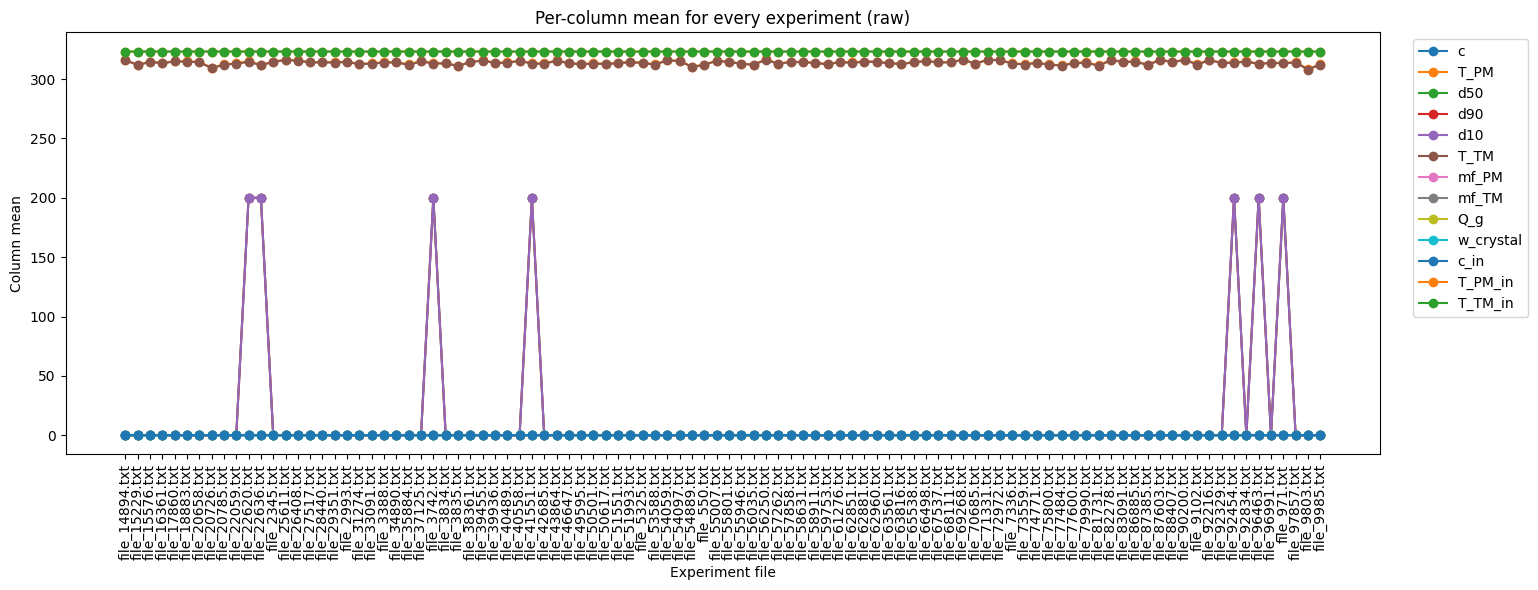

[INFO] Filtered 7 outlier run(s) ‚Üí E:\MLME\Final1\Results\removed_experiments.csv
[INFO] Clean means table ‚Üí E:\MLME\Final1\Results\experiment_column_means_filtered.csv


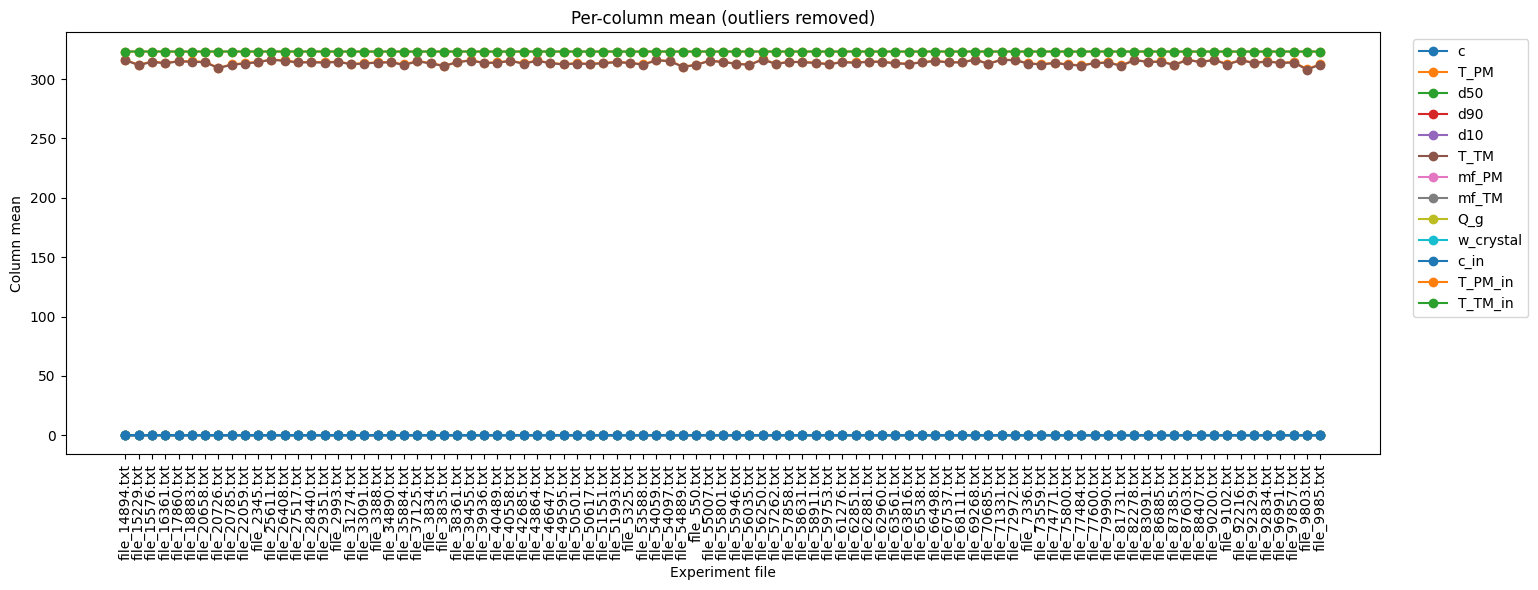

c:\Users\tej31\anaconda3\envs\PAS_2525\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tej31\anaconda3\envs\PAS_2525\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tej31\anaconda3\envs\PAS_2525\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tej31\anaconda3\envs\PAS_2525\lib\site-packages\sklearn\cluster\_kmeans.py:1419: User

[INFO] K-means finished ‚Üí k = 2 (silhouette = 0.302)
[INFO] Saving KMeans model ‚Üí E:\MLME\Final1\Results\kmeans.pkl
[INFO] Assignment table ‚Üí E:\MLME\Final1\Results\cluster_assignments.csv


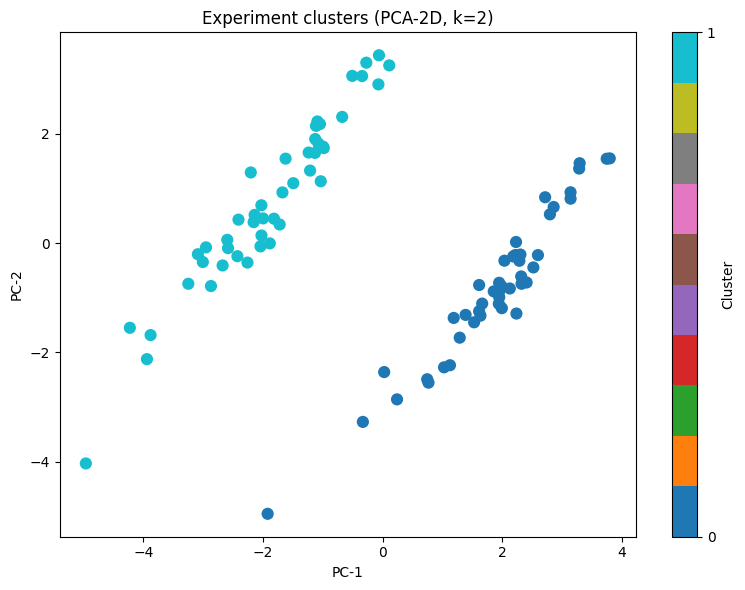

[INFO] PCA image saved ‚Üí E:\MLME\Final1\Results\pca_clusters.png


In [2]:
from __future__ import annotations

import os
import sys
import random
import warnings
import glob

import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import (silhouette_score, mean_squared_error, mean_absolute_error, r2_score,)

# ‚îÄ‚îÄ‚îÄ Global Settings (portable) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
import os
from pathlib import Path

# 1) Determine repository root (where this notebook lives)
BASE_DIR = Path().resolve()

# 2) Default input and output directories (relative to repo)
DEFAULT_IN  = BASE_DIR / "Data"
DEFAULT_OUT = BASE_DIR / "Results"

# 3) Allow environment overrides
DATA_DIR_IN  = Path(os.getenv("MLME_DATA_IN",  DEFAULT_IN))
DATA_DIR_OUT = Path(os.getenv("MLME_DATA_OUT", DEFAULT_OUT))

# 4) Create output directory if it doesn't exist
DATA_DIR_OUT.mkdir(parents=True, exist_ok=True)

# 5) Report settings
print(f"üîπ DATA_DIR_IN:  {DATA_DIR_IN}")
print(f"üîπ DATA_DIR_OUT: {DATA_DIR_OUT}")
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# e.g. listing files
txt_files = list(DATA_DIR_IN.glob("*.txt"))

# reading and writing
import pandas as pd
df = pd.read_csv(txt_files[0], sep="\t")
df.to_csv(DATA_DIR_OUT / "summary.csv", index=False)

# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
# 1. GATHER EXPERIMENT FILES
# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
txt_files = [
    os.path.join(root, fn)
    for root, _, files in os.walk(DATA_DIR_IN)
    for fn in files
    if fn.lower().endswith(".txt")
]
if not txt_files:
    sys.exit(f"[ERROR] No .txt files found under {DATA_DIR_IN}")

# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
# 2. BUILD TABLE OF COLUMN MEANS
# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
rows: list[pd.Series] = []
for fp in txt_files:
    try:
        df = pd.read_csv(fp, sep="\t")
    except Exception:
        df = pd.read_csv(fp, delim_whitespace=True)

    num_df = df.select_dtypes(include=[np.number])
    if num_df.empty:
        warnings.warn(f"{os.path.basename(fp)} ‚Üí skipped (no numeric cols)")
        continue

    s = num_df.mean()
    s.name = os.path.basename(fp)          # row label = file name
    rows.append(s)

means_df = pd.DataFrame(rows).sort_index()
raw_csv = os.path.join(DATA_DIR_OUT, "experiment_column_means.csv")
means_df.to_csv(raw_csv, index_label="experiment")
print(f"[INFO] Saved raw means ‚Üí {raw_csv}")

# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
# 3. RAW PLOT
# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
plt.figure(figsize=(14, 6))
for col in means_df.columns:
    plt.plot(means_df.index, means_df[col], marker="o", label=col)
plt.title("Per-column mean for every experiment (raw)")
plt.xlabel("Experiment file"); plt.ylabel("Column mean")
plt.xticks(rotation=90); plt.tight_layout()
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.show()

# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
# 4. OUTLIER FILTER (d10 / d50 / d90, 1.5√óIQR)
# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
def iqr_mask(series: pd.Series) -> pd.Series:
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    return (series < q1 - 1.5 * iqr) | (series > q3 + 1.5 * iqr)

cols_check = [c for c in ("d10", "d50", "d90") if c in means_df.columns]
mask_outlier = pd.Series(False, index=means_df.index)
for c in cols_check:
    mask_outlier |= iqr_mask(means_df[c])

removed_df = means_df[mask_outlier]
kept_df    = means_df[~mask_outlier]

removed_csv  = os.path.join(DATA_DIR_OUT, "removed_experiments.csv")
kept_csv     = os.path.join(DATA_DIR_OUT, "experiment_column_means_filtered.csv")
removed_df.index.to_series().to_csv(removed_csv, index=False, header=False)
kept_df.to_csv(kept_csv, index_label="experiment")
print(f"[INFO] Filtered {len(removed_df)} outlier run(s) ‚Üí {removed_csv}")
print(f"[INFO] Clean means table ‚Üí {kept_csv}")

# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
# 5. FILTERED PLOT
# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
plt.figure(figsize=(14, 6))
for col in kept_df.columns:
    plt.plot(kept_df.index, kept_df[col], marker="o", label=col)
plt.title("Per-column mean (outliers removed)")
plt.xlabel("Experiment file"); plt.ylabel("Column mean")
plt.xticks(rotation=90); plt.tight_layout()
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.show()

# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
# 6. K-MEANS CLUSTERING ON CLEAN DATA
# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
if len(kept_df) < 3:
    sys.exit("[ERROR] Too few clean experiments to cluster.")

# fill NaNs ‚Äì (rare: cols missing in some files)
X = kept_df.fillna(kept_df.mean()).values
X_scaled = StandardScaler().fit_transform(X)

# choose best k by silhouette, 2 ‚â§ k ‚â§ 10  or ‚â§ N-1
best_k, best_score = None, -1
for k in range(2, min(10, len(kept_df))):
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_scaled)
    try:
        score = silhouette_score(X_scaled, labels)
    except ValueError:        # happens if all pts in 1 cluster
        continue
    if score > best_score:
        best_k, best_score = k, score

if best_k is None:           # fallback
    best_k = 2
    best_score = float("nan")

kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
kept_df["cluster"] = cluster_labels
print(f"[INFO] K-means finished ‚Üí k = {best_k} (silhouette = {best_score:.3f})")
# save the model
kmeans_path = os.path.join(DATA_DIR_OUT, "kmeans.pkl")
print(f"[INFO] Saving KMeans model ‚Üí {kmeans_path}")
joblib.dump(kmeans, kmeans_path)
# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
# 7. SAVE CLUSTER LISTS
# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
assign_csv = os.path.join(DATA_DIR_OUT, "cluster_assignments.csv")
kept_df["cluster"].to_csv(assign_csv, header=["cluster"])
print(f"[INFO] Assignment table ‚Üí {assign_csv}")

for cl in sorted(kept_df["cluster"].unique()):
    cl_csv = os.path.join(DATA_DIR_OUT, f"cluster_{cl}.csv")
    kept_df[kept_df["cluster"] == cl].index.to_series().to_csv(
        cl_csv, index=False, header=False
    )

# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
# 8. 2-D PCA VISUALISATION
# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
pca = PCA(n_components=2, random_state=42)
XY = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(XY[:, 0], XY[:, 1], c=cluster_labels,
                      cmap="tab10", s=60)
plt.title(f"Experiment clusters (PCA-2D, k={best_k})")
plt.xlabel("PC-1"); plt.ylabel("PC-2")
plt.colorbar(scatter, ticks=range(best_k), label="Cluster")
plt.tight_layout()
pca_png = os.path.join(DATA_DIR_OUT, "pca_clusters.png")
plt.savefig(pca_png, dpi=150)
plt.show()
print(f"[INFO] PCA image saved ‚Üí {pca_png}")   
# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê

In [3]:

# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
# 9.  SPLIT EVERY CLUSTER LIST ‚Üí train / val / calib / test(60 % | 20 % | 10 % | 10 % of whole-files, not rows)
# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
_SEED   = 42
_SPLITS = ("train", "val", "calib", "test")
_RATIOS = (0.6, 0.2, 0.1, 0.1)         # must sum to 1.0
rng     = np.random.default_rng(_SEED)

def split_files(filelist, ratios=_RATIOS):
    """Return {split_name: list_of_files} according to ratios."""
    filelist = list(filelist)
    rng.shuffle(filelist)
    n = len(filelist)

    ntrain = int(ratios[0]*n)
    nval   = int(ratios[1]*n)
    ncalib = int(ratios[2]*n)
    return {
        "train":  filelist[:ntrain],
        "val":    filelist[ntrain:ntrain+nval],
        "calib":  filelist[ntrain+nval:ntrain+nval+ncalib],
        "test":   filelist[ntrain+nval+ncalib:],
    }

# loop again over every cluster list we just wrote
for cl_csv in glob.glob(os.path.join(DATA_DIR_OUT, "cluster_*.csv")):
    cid   = os.path.splitext(os.path.basename(cl_csv))[0].split("_")[-1]
    files = pd.read_csv(cl_csv, header=None)[0].tolist()

    if len(files) < 10:
        print(f"[WARN] cluster {cid} has only {len(files)} file(s) ‚Äì skipped split")
        continue

    splits = split_files(files)

    for split_name, paths in splits.items():
        out_csv = os.path.join(DATA_DIR_OUT, f"cluster_{cid}_{split_name}.csv")
        pd.Series(paths).to_csv(out_csv, index=False, header=False)
        print(f"[INFO] cluster {cid}: wrote {split_name} list ‚Üí {out_csv}")


[INFO] cluster 0: wrote train list ‚Üí E:\MLME\Final1\Results\cluster_0_train.csv
[INFO] cluster 0: wrote val list ‚Üí E:\MLME\Final1\Results\cluster_0_val.csv
[INFO] cluster 0: wrote calib list ‚Üí E:\MLME\Final1\Results\cluster_0_calib.csv
[INFO] cluster 0: wrote test list ‚Üí E:\MLME\Final1\Results\cluster_0_test.csv
[WARN] cluster calib has only 4 file(s) ‚Äì skipped split
[WARN] cluster test has only 5 file(s) ‚Äì skipped split
[INFO] cluster train: wrote train list ‚Üí E:\MLME\Final1\Results\cluster_train_train.csv
[INFO] cluster train: wrote val list ‚Üí E:\MLME\Final1\Results\cluster_train_val.csv
[INFO] cluster train: wrote calib list ‚Üí E:\MLME\Final1\Results\cluster_train_calib.csv
[INFO] cluster train: wrote test list ‚Üí E:\MLME\Final1\Results\cluster_train_test.csv
[WARN] cluster val has only 9 file(s) ‚Äì skipped split
[INFO] cluster 1: wrote train list ‚Üí E:\MLME\Final1\Results\cluster_1_train.csv
[INFO] cluster 1: wrote val list ‚Üí E:\MLME\Final1\Results\cluster_1_v


>>> CLUSTER 0


C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.p

  train: 26892 samples


C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.p

  val: 8964 samples


C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.p

  calib: 3984 samples


C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.p

  test: 4980 samples
  epoch 25/150  val MSE=2.928e-02
  epoch 50/150  val MSE=2.796e-02
  epoch 75/150  val MSE=2.755e-02
  epoch 100/150  val MSE=2.870e-02
  epoch 125/150  val MSE=2.940e-02
  epoch 150/150  val MSE=2.624e-02


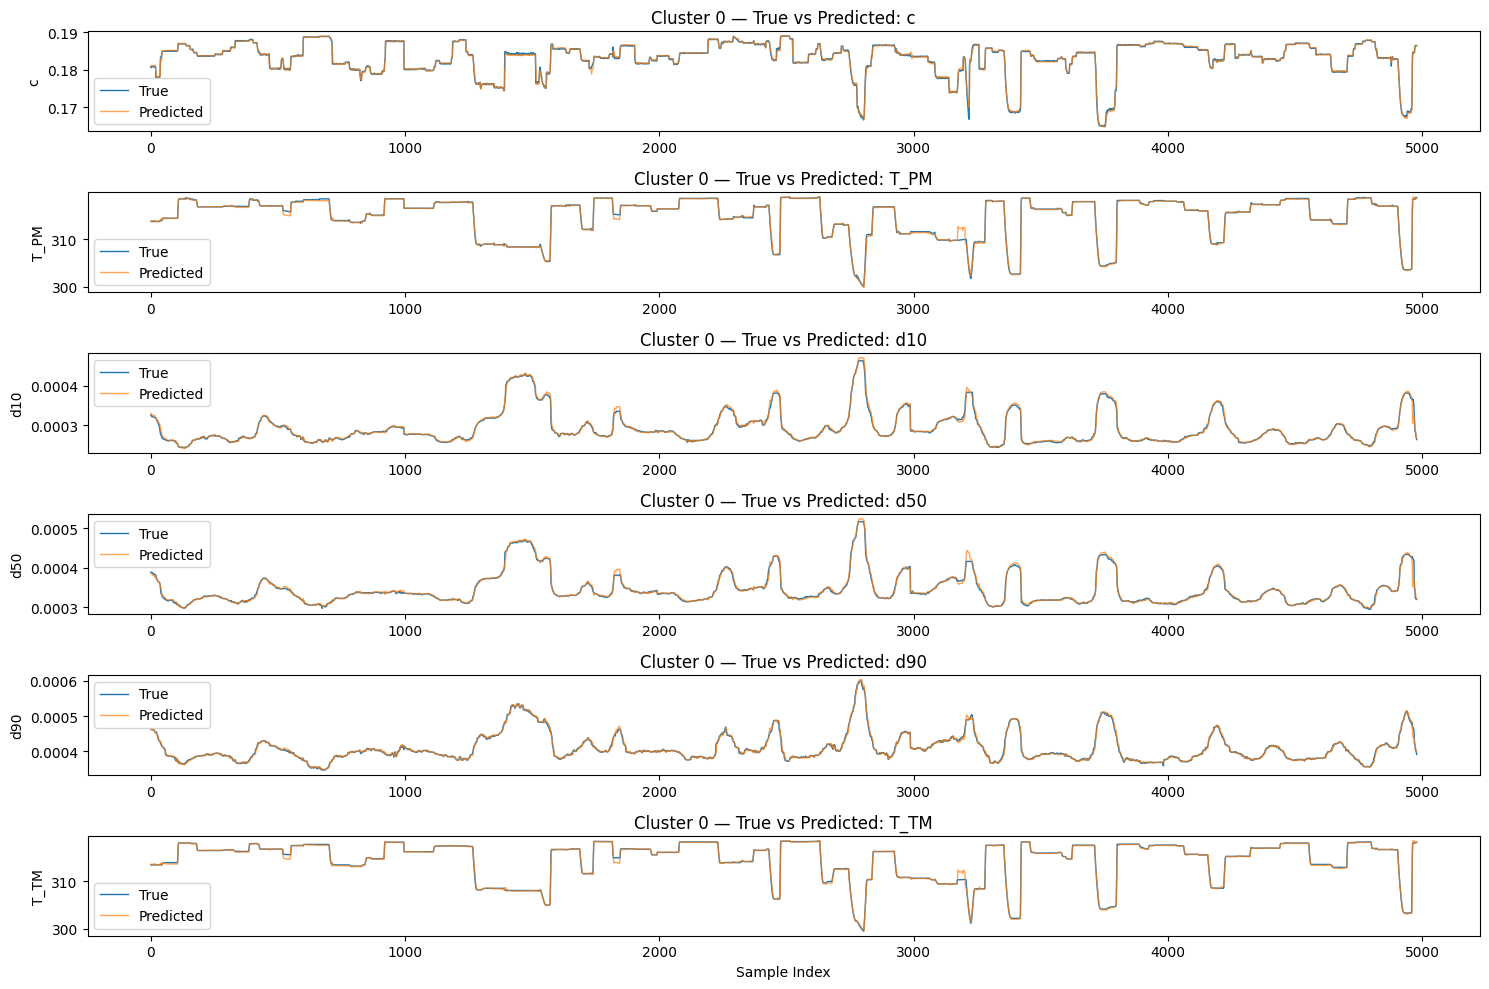

[‚úì] Saved narx_cluster_0.pt

>>> CLUSTER 1


C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.p

  train: 26892 samples


C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.p

  val: 8964 samples


C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.p

  calib: 3984 samples


C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.p

  test: 5976 samples
  epoch 25/150  val MSE=1.412e-02
  epoch 50/150  val MSE=1.245e-02
  epoch 75/150  val MSE=1.230e-02
  epoch 100/150  val MSE=1.263e-02
  epoch 125/150  val MSE=1.272e-02
  epoch 150/150  val MSE=1.317e-02


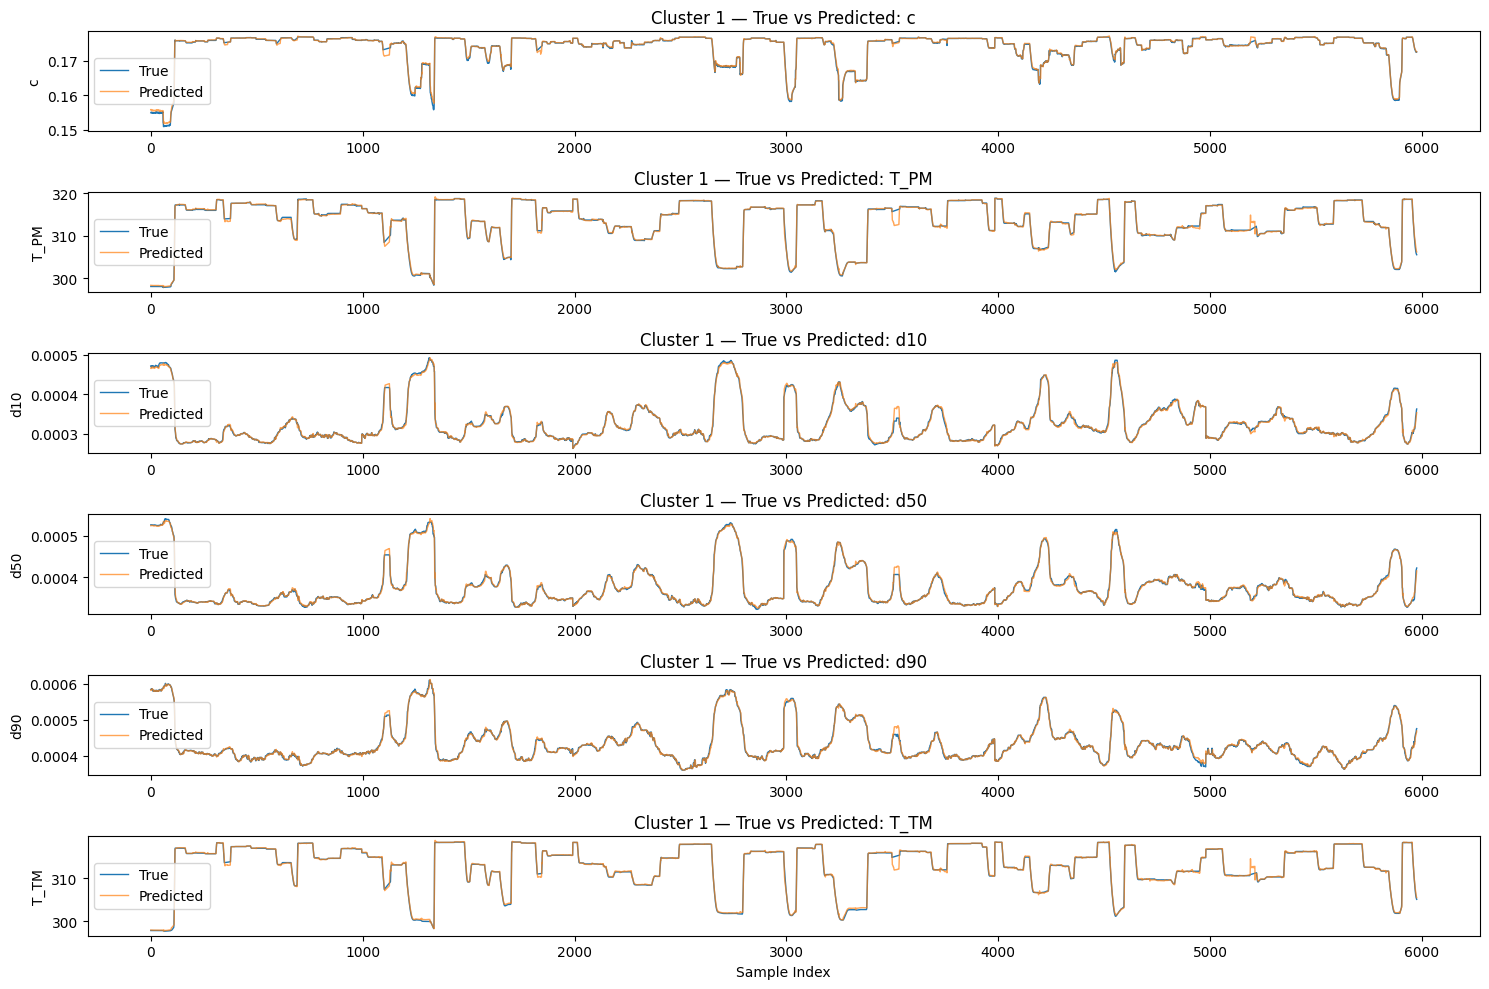

[‚úì] Saved narx_cluster_1.pt


In [4]:

# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
# 10.  ANN MODEL TRAINING Evauation and Visualization
# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê

import os
import glob
import warnings
import random
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# ‚îÄ‚îÄ ANN PARAMETERS ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
TARGET_COLS   = ["c", "T_PM", "d10", "d50", "d90", "T_TM"]
INPUT_COLS    = ["mf_PM","mf_TM","Q_g","w_crystal","c_in","T_PM_in","T_TM_in"]
NA, NB        = 1, 3                 # optimized lags After Grid Search 
H1, H2, H3    = 64,32,64          # hidden layer sizes
DROPOUT       = 0.00458497434616801  # dropout rate
EPOCHS        = 150
BATCH_SIZE    = 128
LR            = 0.00034001634751490005
WEIGHT_DECAY  = 1.0551546494170664e-05  # L2 penalty
SEED          = 42
DEVICE        = "cuda" if torch.cuda.is_available() else "cpu"

# reproducibility
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# ‚îÄ‚îÄ HELPERS ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
def read_txt(fp):
    try:
        return pd.read_csv(fp, sep="\t")
    except:
        return pd.read_csv(fp, delim_whitespace=True)

def build_narx(df):
    maxlag = max(NA, NB)
    Xs, Ys = [], []
    for t in range(maxlag, len(df)-1):
        py = df[TARGET_COLS].iloc[t-NA:t].values[::-1].reshape(-1)
        pu = df[INPUT_COLS].iloc[t-NB:t].values[::-1].reshape(-1)
        Xs.append(np.hstack([py, pu]))
        Ys.append(df[TARGET_COLS].iloc[t+1].values)
    return np.array(Xs, np.float32), np.array(Ys, np.float32)

def rolling_iqr_filter(df, cols, window=150, factor=1.5):
    df_filtered = df.copy()
    for col in cols:
        if col not in df_filtered.columns:
            continue
        rolling_q1 = df_filtered[col].rolling(window, center=True, min_periods=1).quantile(0.25)
        rolling_q3 = df_filtered[col].rolling(window, center=True, min_periods=1).quantile(0.75)
        rolling_iqr = rolling_q3 - rolling_q1

        lower_bound = rolling_q1 - factor * rolling_iqr
        upper_bound = rolling_q3 + factor * rolling_iqr

        mask = (df_filtered[col] < lower_bound) | (df_filtered[col] > upper_bound)

        df_filtered.loc[mask, col] = np.nan
        df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
    return df_filtered

class NARXNetReg(nn.Module):
    def __init__(self, d_in, d_out):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(d_in, H1), nn.ReLU(),
            nn.Dropout(DROPOUT),

            nn.Linear(H1, H2), nn.ReLU(),
            nn.Dropout(DROPOUT),

            nn.Linear(H2, H3), nn.ReLU(),
            nn.Dropout(DROPOUT),

            nn.Linear(H3, d_out),
        )

    def forward(self, x):
        return self.net(x)

def weighted_mse(y_pred, y_true):
    mse = (y_pred - y_true)**2
    return (mse * weights).mean()

def make_loader(X, Y, shuffle=False):
    ds = TensorDataset(torch.from_numpy(X), torch.from_numpy(Y))
    return DataLoader(ds, batch_size=BATCH_SIZE, shuffle=shuffle)

def plot_true_vs_pred_all_states(trues, preds, target_cols, cluster_id):
    plt.figure(figsize=(15, 10))
    n = len(target_cols)
    for i, col in enumerate(target_cols):
        ax = plt.subplot(n, 1, i+1)
        ax.plot(trues[:, i], label="True", linewidth=1)
        ax.plot(preds[:, i], label="Predicted", linewidth=1, alpha=0.7)
        ax.set_title(f"Cluster {cluster_id} ‚Äî True vs Predicted: {col}")
        ax.set_ylabel(col)
        ax.legend()
        if i == n-1:
            ax.set_xlabel("Sample Index")
    plt.tight_layout()
    plt.show()

# ‚îÄ‚îÄ MAIN LOOP OVER CLUSTERS ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ


for cl in sorted(glob.glob(os.path.join(DATA_DIR_OUT, "cluster_[0-9]*_train.csv"))):
    cid = os.path.basename(cl).split("_")[1]
    print(f"\n>>> CLUSTER {cid}")

    # 1) load split lists
    splits = {}
    for split in ("train","val","calib","test"):
        fp = os.path.join(DATA_DIR_OUT, f"cluster_{cid}_{split}.csv")
        splits[split] = pd.read_csv(fp, header=None)[0].dropna().astype(str).tolist()

    # 2) build & stack data
    data = {}
    for split, files in splits.items():
        Xs, Ys = [], []
        for fn in files:
            path = os.path.join(DATA_DIR_IN, fn)
            if not os.path.isfile(path):
                warnings.warn(f"{path} not found ‚Üí skip")
                continue
            df = read_txt(path)

            # Apply rolling median smoothing on d10, d50, d90
            for col in ["d10", "d50", "d90"]:
                if col in df.columns:
                    df[col] = df[col].rolling(window=50, center=True, min_periods=1).median()

            # Apply rolling IQR filter on c, T_PM, T_TM
            df = rolling_iqr_filter(df, ["c", "T_PM", "T_TM"], window=150, factor=1.5)

            if any(c not in df.columns for c in TARGET_COLS + INPUT_COLS):
                warnings.warn(f"{fn} missing cols ‚Üí skip")
                continue

            Xf, Yf = build_narx(df)
            if Xf.size:
                Xs.append(Xf)
                Ys.append(Yf)

        if len(Xs) == 0:
            print(f"[WARN] No valid data for split {split} in cluster {cid}")
            data[split] = (np.empty((0, len(INPUT_COLS)*(NB+NA))), np.empty((0,len(TARGET_COLS))))
        else:
            Xs = np.vstack(Xs)
            Ys = np.vstack(Ys)
            data[split] = (Xs, Ys)

        print(f"  {split}: {data[split][0].shape[0]} samples")

    # 3) standardize
    xsc = StandardScaler().fit(data["train"][0])
    ysc = StandardScaler().fit(data["train"][1])
    for split in data:
        X, Y = data[split]
        data[split] = (xsc.transform(X), ysc.transform(Y))

    # Calculate weights for weighted MSE
    Y_train = data["train"][1]
    stds = np.std(Y_train, axis=0)
    weights = 1.0 / (stds + 1e-8)
    weights = weights / np.max(weights)
    weights = torch.tensor(weights, device=DEVICE)

    # 4) dataloaders
    loaders = {s: make_loader(*data[s], shuffle=(s=="train")) for s in data}

    # 5) instantiate model and optimizer
    d_in = data["train"][0].shape[1]
    d_out = len(TARGET_COLS)
    model = NARXNetReg(d_in, d_out).to(DEVICE)
    opt = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

    # 6) training loop
    best_val, best_state = float("inf"), None
    for ep in range(1, EPOCHS+1):
        model.train()
        for xb, yb in loaders["train"]:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            opt.zero_grad()
            loss = weighted_mse(model(xb), yb)
            loss.backward()
            opt.step()

        # validation
        model.eval()
        preds_v, trues_v = [], []
        with torch.no_grad():
            for xb, yb in loaders["val"]:
                yp = model(xb.to(DEVICE)).cpu().numpy()
                preds_v.append(yp)
                trues_v.append(yb.numpy())
        preds_v = ysc.inverse_transform(np.vstack(preds_v))
        trues_v = ysc.inverse_transform(np.vstack(trues_v))
        vm = mean_squared_error(trues_v, preds_v)
        if vm < best_val:
            best_val, best_state = vm, model.state_dict()
        if ep % 25 == 0:
            print(f"  epoch {ep}/{EPOCHS}  val MSE={vm:.3e}")

    # 7) evaluate on test
    model.load_state_dict(best_state)
    Xt, Yt = data["test"]
    preds, trues = [], []
    model.eval()
    with torch.no_grad():
        for xb, yb in make_loader(Xt, Yt):
            yp = model(xb.to(DEVICE)).cpu().numpy()
            preds.append(yp)
            trues.append(yb.numpy())
    preds = ysc.inverse_transform(np.vstack(preds))
    trues = ysc.inverse_transform(np.vstack(trues))

    rows = []
    for i, state in enumerate(TARGET_COLS):
        yp, yt = preds[:,i], trues[:,i]
        rows.append({
            "State": state,
            "MSE": mean_squared_error(yt, yp),
            "MAE": mean_absolute_error(yt, yp),
            "R2": r2_score(yt, yp)
        })
    dfm = pd.DataFrame(rows).set_index("State")

    from IPython.display import display
    display(dfm.style.format({"MSE":"{:.6e}","MAE":"{:.6e}","R2":"{:.6f}"}).set_caption(f"Cluster {cid} ‚Äî Test Metrics by State"))

    # 8) visualize true vs predicted for this cluster
    plot_true_vs_pred_all_states(trues, preds, TARGET_COLS, cluster_id=cid)

    # 9) save model and scalers
    torch.save({
        "model": model.cpu().state_dict(),
        "x_mean": xsc.mean_, "x_scale": xsc.scale_,
        "y_mean": ysc.mean_, "y_scale": ysc.scale_,
        "config": dict(NA=NA, NB=NB,
                       TARGET_COLS=TARGET_COLS,
                       INPUT_COLS=INPUT_COLS,
                       H1=H1, H2=H2, H3=H3,
                       dropout=DROPOUT)
    }, os.path.join(DATA_DIR_OUT, f"narx_cluster_{cid}.pt"))
    print(f"[‚úì] Saved narx_cluster_{cid}.pt")


In [5]:
# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê 
# 13. CQR Approximation Error Œµ_app
# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê

import re

calib_files = sorted(glob.glob(os.path.join(DATA_DIR_OUT, "cluster_*_calib.csv")))
calib_files = [f for f in calib_files if re.match(r".*cluster_\d+_calib\.csv", f)]
print(f"[INFO] data_dir_out: {DATA_DIR_OUT}")

for cluster_calib_csv in calib_files:
    cid = os.path.basename(cluster_calib_csv).split("_")[1]
    print(f"\n>>> Computing Œµ_app for cluster {cid}")

    ckpt_path = os.path.join(DATA_DIR_OUT, f"narx_cluster_{cid}.pt")
    if not os.path.isfile(ckpt_path):
        print(f"[WARN] Model checkpoint not found for cluster {cid} ‚Üí skipping")
        continue

    # ‚úÖ correct way: torch.load with weights_only=False
    ckpt = torch.load(ckpt_path, map_location=DEVICE, weights_only=False)

    xsc = StandardScaler(); xsc.mean_, xsc.scale_ = ckpt["x_mean"], ckpt["x_scale"]
    ysc = StandardScaler(); ysc.mean_, ysc.scale_ = ckpt["y_mean"], ckpt["y_scale"]

    # rebuild model
    d_in = len(xsc.mean_)
    model = NARXNetReg(d_in, len(TARGET_COLS)).to(DEVICE)
    model.load_state_dict(ckpt["model"])
    model.eval()

    # 2) Load calibration file list
    file_list = pd.read_csv(cluster_calib_csv, header=None)[0].dropna().astype(str)

    # 3) Build X_cal, Y_cal
    Xs, Ys = [], []
    for fn in file_list:
        df = read_txt(os.path.join(DATA_DIR_IN, fn))
        # Apply rolling median and IQR smoothing
        for col in ["d10", "d50", "d90"]:
            if col in df.columns:
                df[col] = df[col].rolling(window=150, center=True, min_periods=1).median()
                df = rolling_iqr_filter(df, ["c", "T_PM", "T_TM"], window=150, factor=1.5)

        if any(c not in df.columns for c in TARGET_COLS + INPUT_COLS):
            warnings.warn(f"{fn} missing cols ‚Üí skip")
            continue

        Xf, Yf = build_narx(df)
        if Xf.size:
            Xs.append(Xf); Ys.append(Yf)

    if not Xs:
        print(f"[WARN] No valid calibration data for cluster {cid}")
        continue

    X_cal = np.vstack(Xs)
    Y_cal = np.vstack(Ys)

    # 4) Scale and predict
    Xs_scaled = xsc.transform(X_cal)
    with torch.no_grad():
        yhat_scaled = model(torch.from_numpy(Xs_scaled).to(DEVICE)).cpu().numpy()
    yhat = ysc.inverse_transform(yhat_scaled)

    # 5) Compute approximation errors Œµ_app = yhat - y
    eps_app = yhat - Y_cal

    # 6) Save errors to CSV
    df_eps = pd.DataFrame(eps_app, columns=[f"eps_{s}" for s in TARGET_COLS])
    out_csv = os.path.join(DATA_DIR_OUT, f"eps_app_cluster_{cid}.csv")
    df_eps.to_csv(out_csv, index=False)
    print(f"[‚úì] Wrote Œµ_app ‚Üí {out_csv}")



[INFO] data_dir_out: E:\MLME\Final1\Results

>>> Computing Œµ_app for cluster 0


C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.p

[‚úì] Wrote Œµ_app ‚Üí E:\MLME\Final1\Results\eps_app_cluster_0.csv

>>> Computing Œµ_app for cluster 1


C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\885777641.p

[‚úì] Wrote Œµ_app ‚Üí E:\MLME\Final1\Results\eps_app_cluster_1.csv



>>> Visualizing Œµ_app for cluster 0


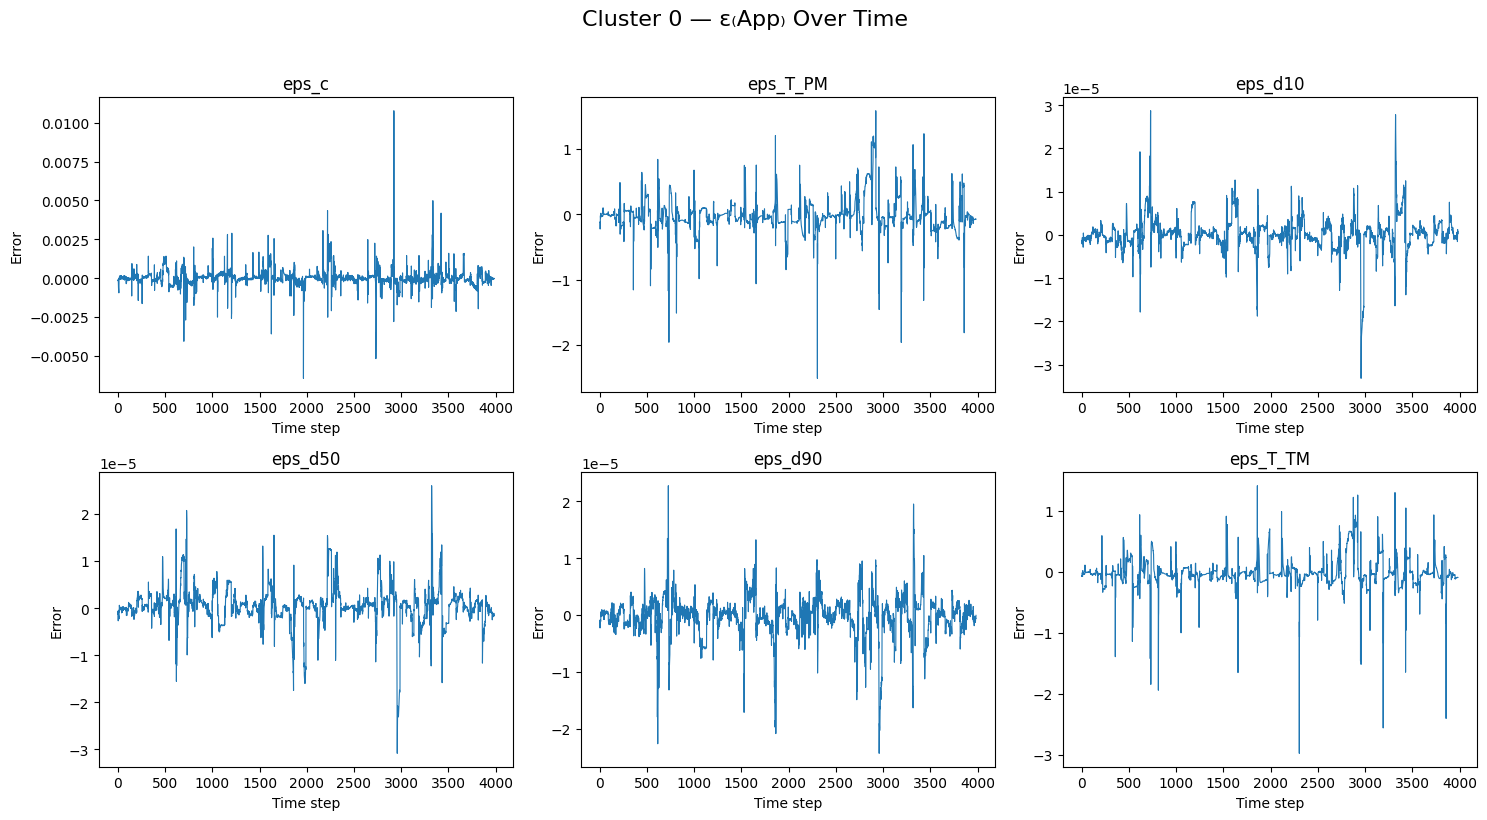

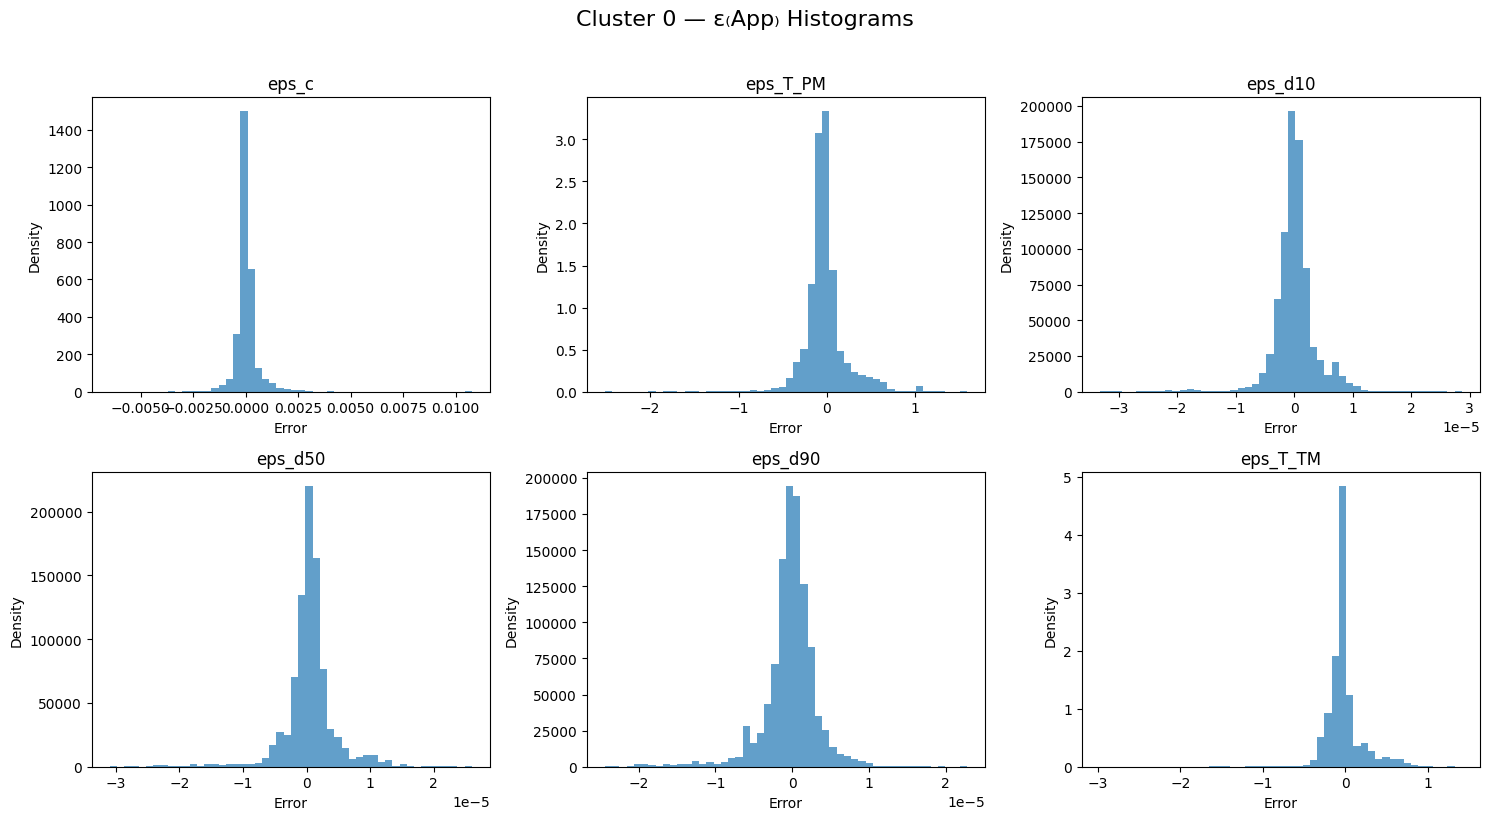

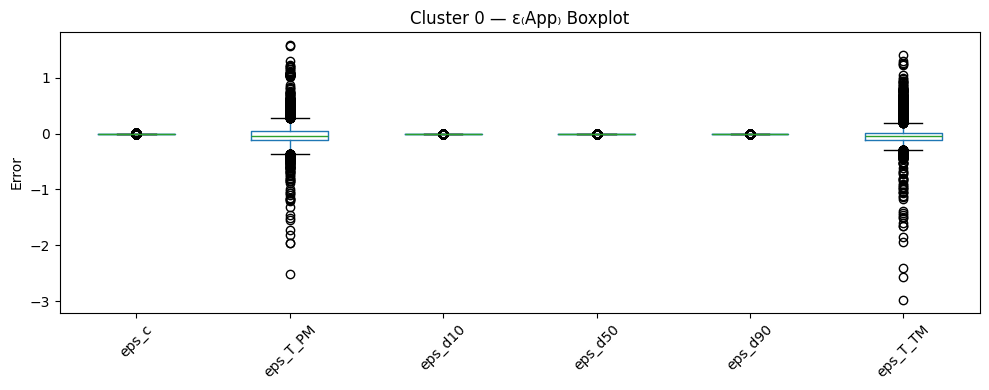


>>> Visualizing Œµ_app for cluster 1


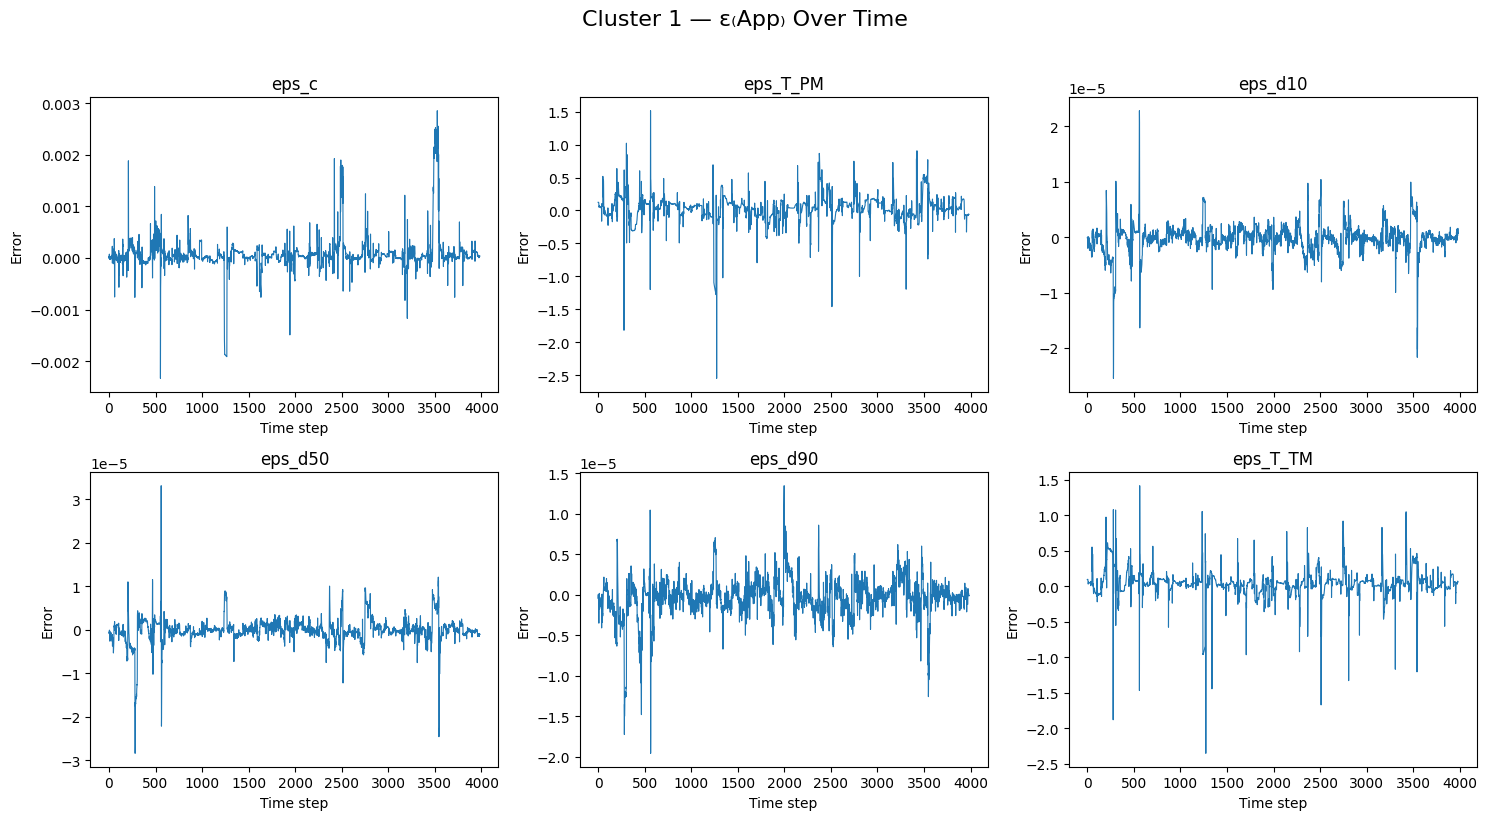

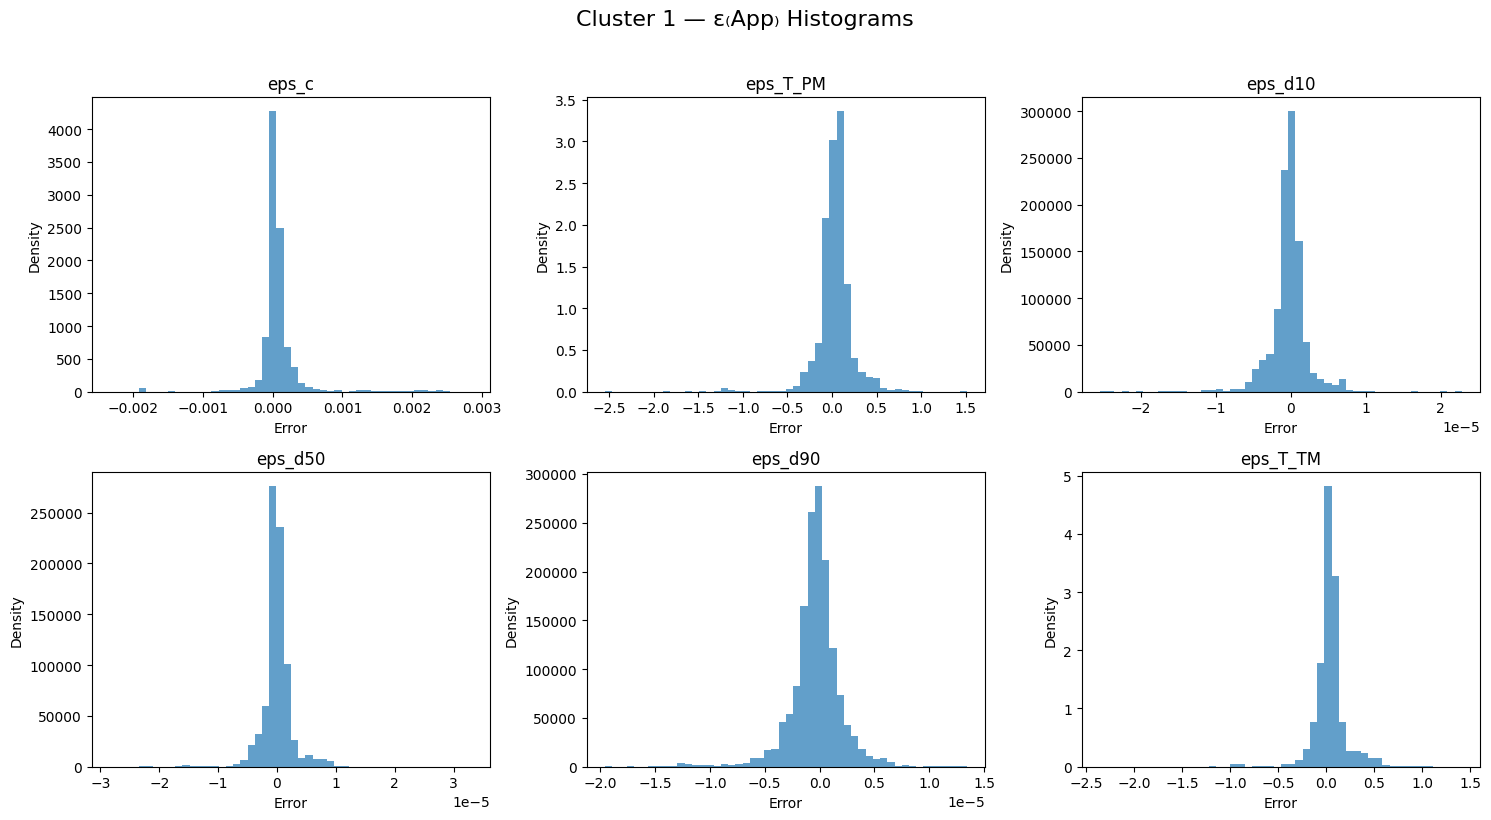

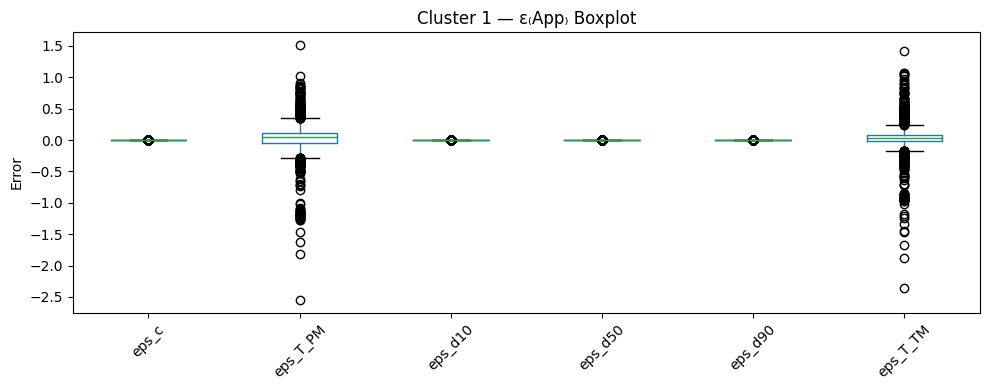

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import re

eps_files = sorted(glob.glob(os.path.join(DATA_DIR_OUT, "eps_app_cluster_*.csv")))
eps_files = [f for f in eps_files if re.match(r".*eps_app_cluster_\d+\.csv", f)]

for eps_csv in eps_files:
    cid = os.path.basename(eps_csv).split("_")[3].split(".")[0]
    df_eps  = pd.read_csv(eps_csv)

    print(f"\n>>> Visualizing Œµ_app for cluster {cid}")

    states = df_eps.columns.tolist()

    # 1) Plot approximation errors over time
    fig, axes = plt.subplots(2, 3, figsize=(15, 8), tight_layout=True)
    fig.suptitle(f"Cluster {cid} ‚Äî Œµ‚ÇçApp‚Çé Over Time", y=1.02, fontsize=16)
    time_steps = np.arange(len(df_eps))
    for ax, state in zip(axes.flatten(), states):
        ax.plot(time_steps, df_eps[state], lw=0.8)
        ax.set_title(state)
        ax.set_xlabel("Time step")
        ax.set_ylabel("Error")
    plt.show()

    # 2) Plot histograms
    fig, axes = plt.subplots(2, 3, figsize=(15, 8), tight_layout=True)
    fig.suptitle(f"Cluster {cid} ‚Äî Œµ‚ÇçApp‚Çé Histograms", y=1.02, fontsize=16)
    for ax, state in zip(axes.flatten(), states):
        ax.hist(df_eps[state], bins=50, density=True, alpha=0.7)
        ax.set_title(state)
        ax.set_xlabel("Error")
        ax.set_ylabel("Density")
    plt.show()

    # 3) Plot a single boxplot of all states
    plt.figure(figsize=(10, 4))
    df_eps.boxplot(grid=False)
    plt.title(f"Cluster {cid} ‚Äî Œµ‚ÇçApp‚Çé Boxplot")
    plt.ylabel("Error")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



>>> Applying rolling median filter to Œµ_app for cluster 0


C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\3033232352.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')


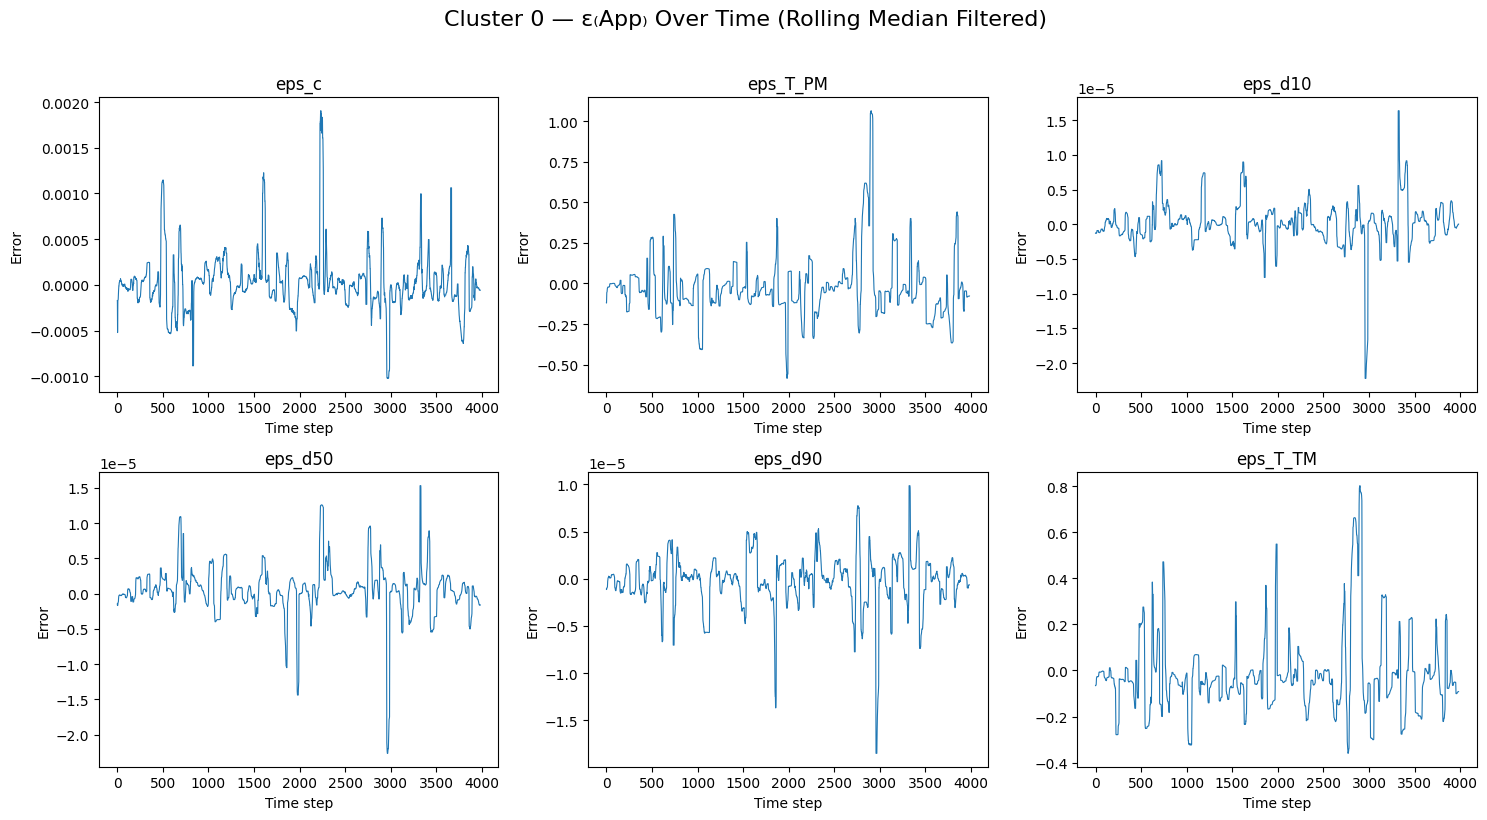

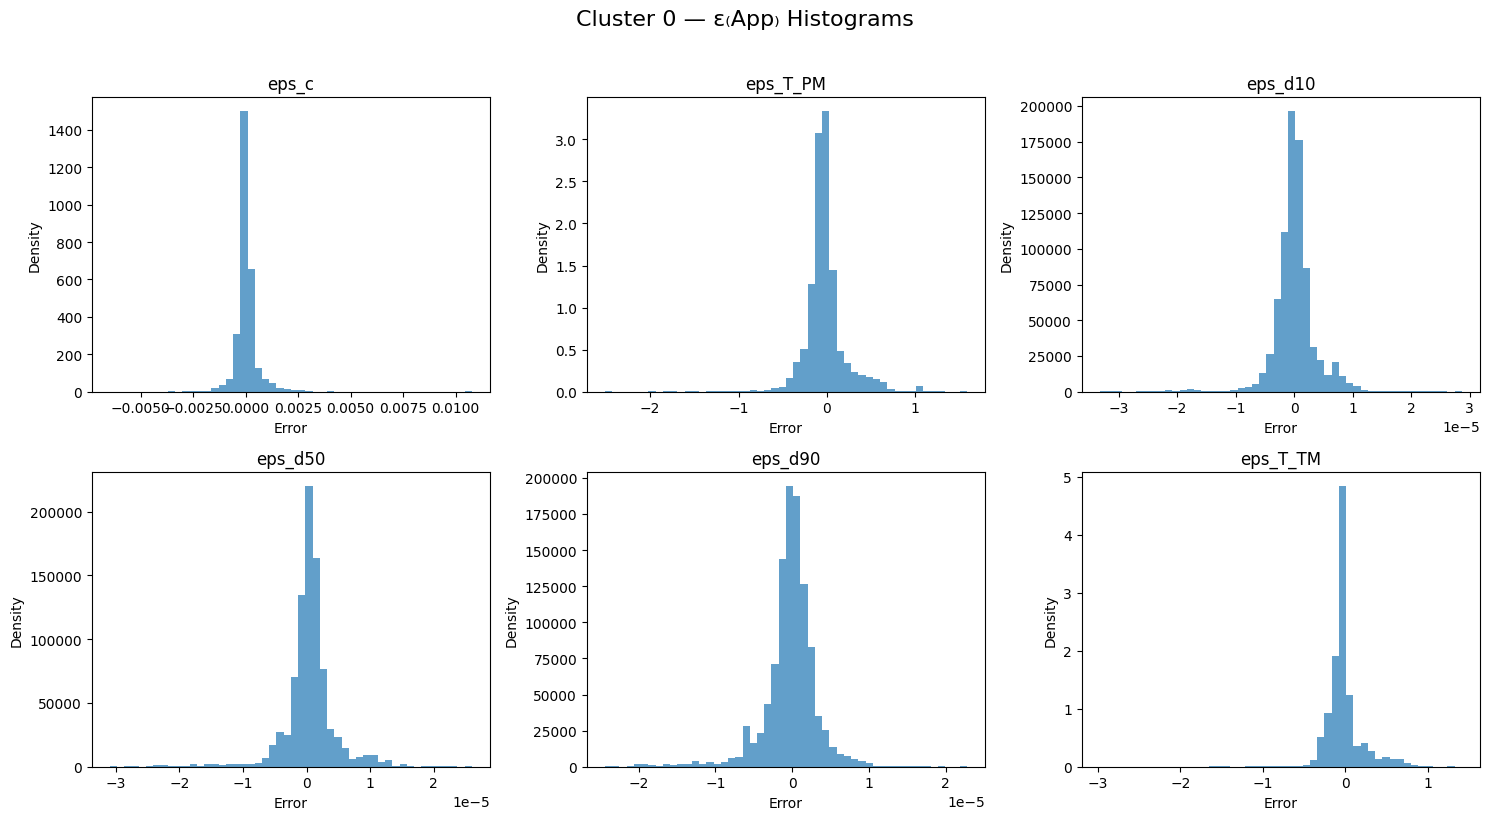

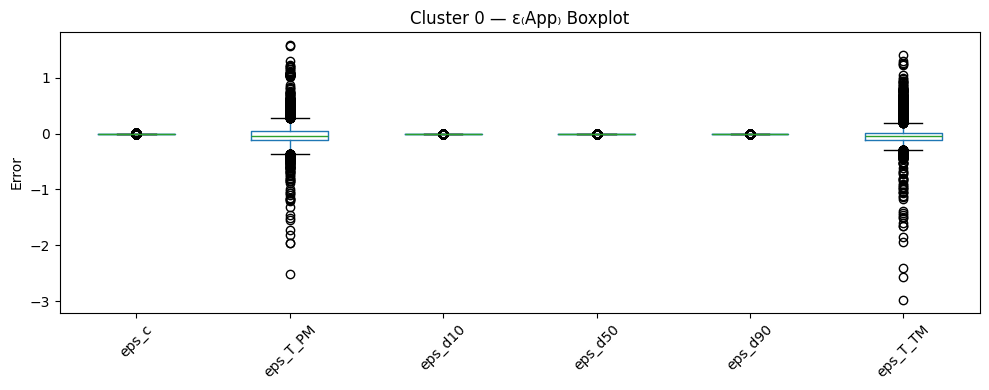


>>> Applying rolling median filter to Œµ_app for cluster 1


C:\Users\tej31\AppData\Local\Temp\ipykernel_25920\3033232352.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')


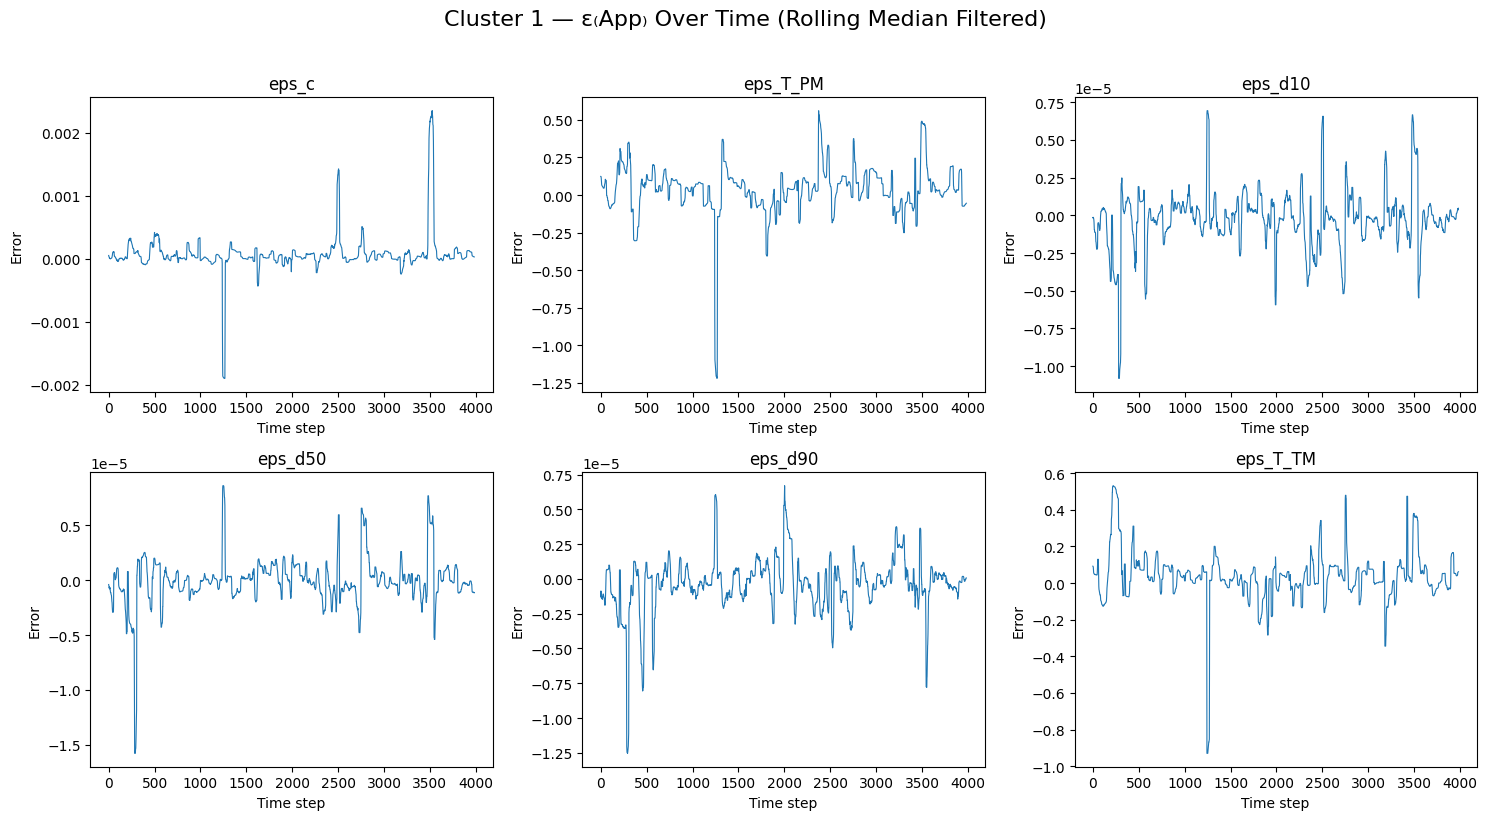

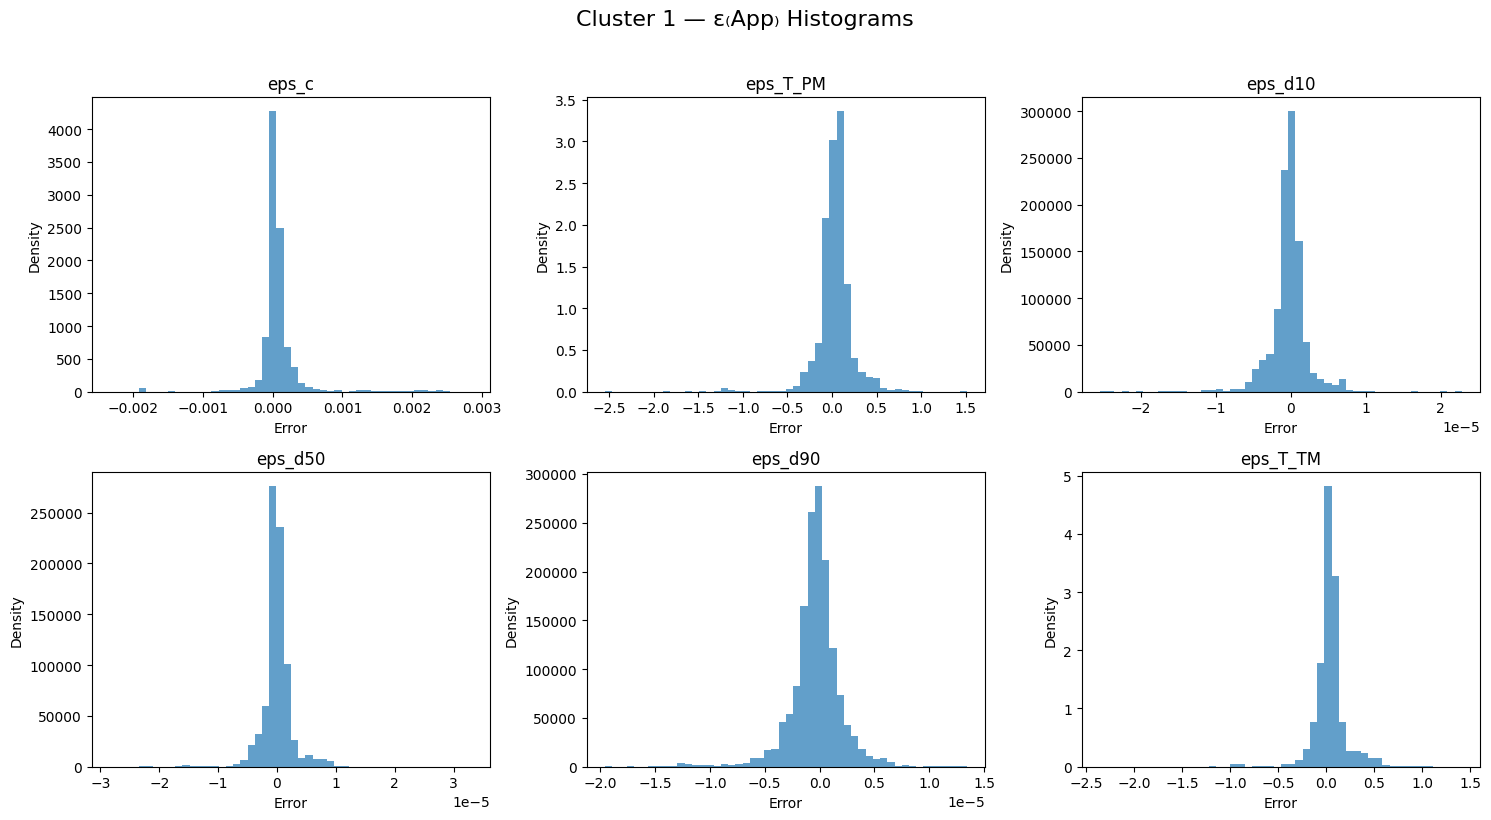

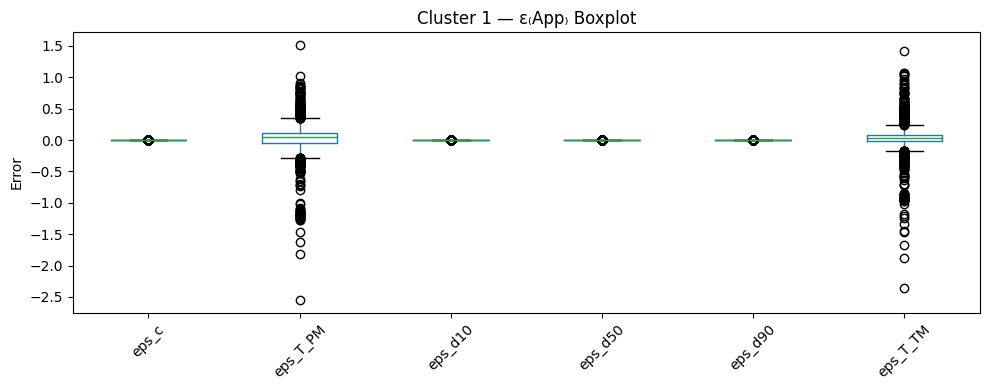

In [7]:
def rolling_median_filter(df, window=5):
    df_filtered = df.copy()
    for col in df_filtered.columns:
        df_filtered[col] = df_filtered[col].rolling(window=window, center=True, min_periods=1).median()
        # Optional: interpolate to fill NaNs at edges after rolling
        df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
    return df_filtered

# Usage example inside your visualization loop:
for eps_csv in eps_files:
    cid = os.path.basename(eps_csv).split("_")[3].split(".")[0]
    df_eps = pd.read_csv(eps_csv)

    print(f"\n>>> Applying rolling median filter to Œµ_app for cluster {cid}")

    df_eps_filtered = rolling_median_filter(df_eps, window=20)  

    # Plot filtered errors over time
    states = df_eps_filtered.columns.tolist()
    fig, axes = plt.subplots(2, 3, figsize=(15, 8), tight_layout=True)
    fig.suptitle(f"Cluster {cid} ‚Äî Œµ‚ÇçApp‚Çé Over Time (Rolling Median Filtered)", y=1.02, fontsize=16)
    time_steps = np.arange(len(df_eps_filtered))
    for ax, state in zip(axes.flatten(), states):
        ax.plot(time_steps, df_eps_filtered[state], lw=0.8)
        ax.set_title(state)
        ax.set_xlabel("Time step")
        ax.set_ylabel("Error")
    plt.show()
    # 2) Plot histograms
    fig, axes = plt.subplots(2, 3, figsize=(15, 8), tight_layout=True)
    fig.suptitle(f"Cluster {cid} ‚Äî Œµ‚ÇçApp‚Çé Histograms", y=1.02, fontsize=16)
    for ax, state in zip(axes.flatten(), states):
        ax.hist(df_eps[state], bins=50, density=True, alpha=0.7)
        ax.set_title(state)
        ax.set_xlabel("Error")
        ax.set_ylabel("Density")
    plt.show()
    # 3) Plot a single boxplot of all states
    plt.figure(figsize=(10, 4))
    df_eps.boxplot(grid=False)
    plt.title(f"Cluster {cid} ‚Äî Œµ‚ÇçApp‚Çé Boxplot")
    plt.ylabel("Error")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê


In [8]:
# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
# 15. Train Quantile Regression Models for Œµ_app
# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê

import re
import os
import glob
import warnings
import random
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# ‚îÄ‚îÄ SETTINGS ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
DROPOUT      = 0.23555278841790406
EPOCHS       = 150
DEVICE       = "cuda" if torch.cuda.is_available() else "cpu"
LR           = 0.0008168455894760162
BATCH_SIZE   = 128

def rolling_median_filter(df: pd.DataFrame | np.ndarray, window=10) -> np.ndarray:
    """
    Apply rolling median filter along the time axis (rows).
    Accepts DataFrame or 2D numpy array, returns numpy array.
    """
    if isinstance(df, np.ndarray):
        df = pd.DataFrame(df)
    df_filtered = df.rolling(window=window, center=True, min_periods=1).median()
    df_filtered = df_filtered.interpolate(method='linear', limit_direction='both')
    return df_filtered.values

# discover clusters dynamically
eps_files = sorted(glob.glob(os.path.join(DATA_DIR_OUT, "eps_app_cluster_*.csv")))
eps_files = [f for f in eps_files if re.match(r".*eps_app_cluster_\d+\.csv", f)]
cluster_ids = [os.path.basename(f).split("_")[3].split(".")[0] for f in eps_files]

# ‚îÄ‚îÄ Pinball (quantile) loss ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
class PinballLoss(nn.Module):
    def __init__(self, tau: float):
        super().__init__()
        self.tau = tau
    def forward(self, y_pred, y_true):
        diff = y_true - y_pred
        loss = torch.max(self.tau * diff, (self.tau - 1) * diff)
        return loss.mean()

# ‚îÄ‚îÄ Simple 3-layer quantile net ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
class QuantileNet(nn.Module):
    # ‚îÄ‚îÄ SETTINGS ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    H1, H2, H3  =  256,64,32# hidden layer sizes
    DROPOUT      = 0.23555278841790406
    EPOCHS       = 150
    DEVICE       = "cuda" if torch.cuda.is_available() else "cpu"
    LR           = 0.0008168455894760162
    BATCH_SIZE   = 128
    def __init__(self, d_in, d_out, H1=H1, H2=H2,H3=H3,dropout=0.05):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(d_in, H1), nn.Tanh(), nn.Dropout(dropout),
            nn.Linear(H1, H2), nn.Tanh(), nn.Dropout(dropout),
            nn.Linear(H2, H3), nn.Tanh(),
            nn.Linear(H3, d_out)
        )
    def forward(self, x): return self.net(x)


print(f"[INFO] Found clusters: {cluster_ids}")

for cluster_id in cluster_ids:
    print(f"\n=== Cluster {cluster_id} ===")

    # 1) load calibration features
    calib_csv = os.path.join(DATA_DIR_OUT, f"cluster_{cluster_id}_calib.csv")
    if not os.path.isfile(calib_csv):
        print(f"[WARN] Calibration file missing for cluster {cluster_id} ‚Üí skipping")
        continue

    files = pd.read_csv(calib_csv, header=None)[0].dropna().astype(str)

    X_list, eps_list = [], []
    # load eps_app
    eps_path = os.path.join(DATA_DIR_OUT, f"eps_app_cluster_{cluster_id}.csv")
    eps_df = pd.read_csv(eps_path)

    # rebuild X_cal then match lengths
    for fn in files:
        # Ensure the file path is correct (use DATA_DIR_IN)
        file_path = os.path.join(DATA_DIR_IN, fn)
        if not os.path.isfile(file_path):
            print(f"[WARN] File missing: {file_path} ‚Üí skipping")
            continue
        df = read_txt(file_path)
        Xf, _ = build_narx(df)
        X_list.append(Xf)

    if not X_list:
        print(f"[WARN] No valid calibration data for cluster {cluster_id} ‚Üí skipping")
        continue
    X_cal = np.vstack(X_list)

    # Apply rolling median filter to smooth errors before training quantile nets
    eps_cal_raw = eps_df.values[:len(X_cal), :]  # align rows
    eps_cal = rolling_median_filter(eps_cal_raw, window=5)

    # 2) scale X only
    xscaler = StandardScaler().fit(X_cal)
    Xs = xscaler.transform(X_cal)
    Ys = eps_cal.astype(np.float32)

    ds = TensorDataset(torch.from_numpy(Xs), torch.from_numpy(Ys))
    loader = DataLoader(ds, batch_size=BATCH_SIZE, shuffle=True)

    d_in  = Xs.shape[1]
    print(d_in, "input features")
    d_out = Ys.shape[1]
    print(d_out, "output states (Œµ_app)")

    for tau in (0.05, 0.95):
        print(f" training œÑ={tau:.2f} quantile")
        net   = QuantileNet(d_in, d_out).to(DEVICE)
        loss_fn = PinballLoss(tau).to(DEVICE)
        opt   = torch.optim.Adam(net.parameters(), lr=LR)

        # train
        for epoch in range(1, EPOCHS+1):
            net.train()
            total = 0.0
            for xb, yb in loader:
                xb, yb = xb.to(DEVICE), yb.to(DEVICE)
                opt.zero_grad()
                yp = net(xb)
                loss = loss_fn(yp, yb)
                loss.backward()
                opt.step()
                total += loss.item() * xb.size(0)
            if epoch % 20 == 0:
                print(f"  epoch {epoch}/{EPOCHS}  loss={total/len(ds):.4e}")

        # save model + scaler + œÑ
        out_path = os.path.join(DATA_DIR_OUT, f"quantile_{tau:.2f}_cluster_{cluster_id}.pt")
        torch.save({
            "model": net.cpu().state_dict(),
            "x_mean": xscaler.mean_, "x_scale": xscaler.scale_,
            "tau": tau,
            "config": dict(NA=NA, NB=NB, H1=H1, H2=H2, H3=H3)
        }, out_path)
        print(f"  ‚úì saved {os.path.basename(out_path)}")


[INFO] Found clusters: ['0', '1']

=== Cluster 0 ===
27 input features
6 output states (Œµ_app)
 training œÑ=0.05 quantile
  epoch 20/150  loss=4.9841e-03
  epoch 40/150  loss=4.5585e-03
  epoch 60/150  loss=4.2213e-03
  epoch 80/150  loss=4.0274e-03
  epoch 100/150  loss=3.7533e-03
  epoch 120/150  loss=3.7397e-03
  epoch 140/150  loss=3.5067e-03
  ‚úì saved quantile_0.05_cluster_0.pt
 training œÑ=0.95 quantile
  epoch 20/150  loss=5.4099e-03
  epoch 40/150  loss=5.2115e-03
  epoch 60/150  loss=4.7197e-03
  epoch 80/150  loss=4.4828e-03
  epoch 100/150  loss=4.2852e-03
  epoch 120/150  loss=4.0261e-03
  epoch 140/150  loss=4.0013e-03
  ‚úì saved quantile_0.95_cluster_0.pt

=== Cluster 1 ===
27 input features
6 output states (Œµ_app)
 training œÑ=0.05 quantile
  epoch 20/150  loss=5.0431e-03
  epoch 40/150  loss=4.5844e-03
  epoch 60/150  loss=4.2861e-03
  epoch 80/150  loss=4.1221e-03
  epoch 100/150  loss=3.7075e-03
  epoch 120/150  loss=3.6340e-03
  epoch 140/150  loss=3.2621e-03
  

[INFO] Found clusters: ['0', '1']

>>> Cluster 0
 Œ± per state: {'c': np.float64(6.186589416001933e-05), 'T_PM': np.float64(-0.005017026805747918), 'd10': np.float64(0.000987461799560182), 'd50': np.float64(0.0012530853767945278), 'd90': np.float64(0.0004044435947800682), 'T_TM': np.float64(-0.003748359648097229)}
[‚úì] Wrote conformal intervals ‚Üí cqr_intervals_cluster_0.csv


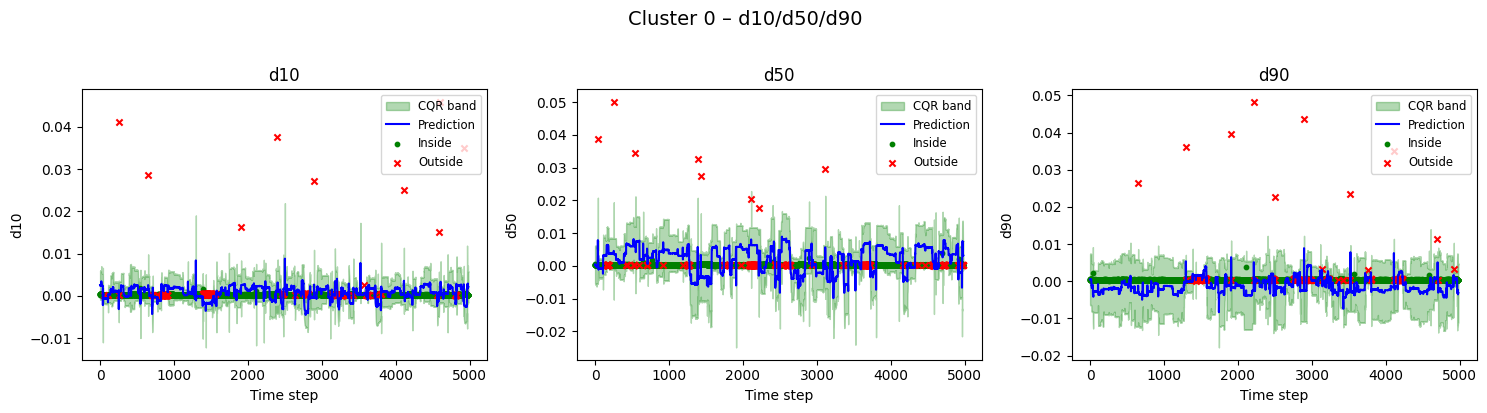


>>> Cluster 1
 Œ± per state: {'c': np.float64(-0.00040502548213370556), 'T_PM': np.float64(0.005402306389968886), 'd10': np.float64(-0.0014323856274048835), 'd50': np.float64(-9.525325147689782e-05), 'd90': np.float64(-0.0010104212153253208), 'T_TM': np.float64(-0.007448641805562193)}
[‚úì] Wrote conformal intervals ‚Üí cqr_intervals_cluster_1.csv


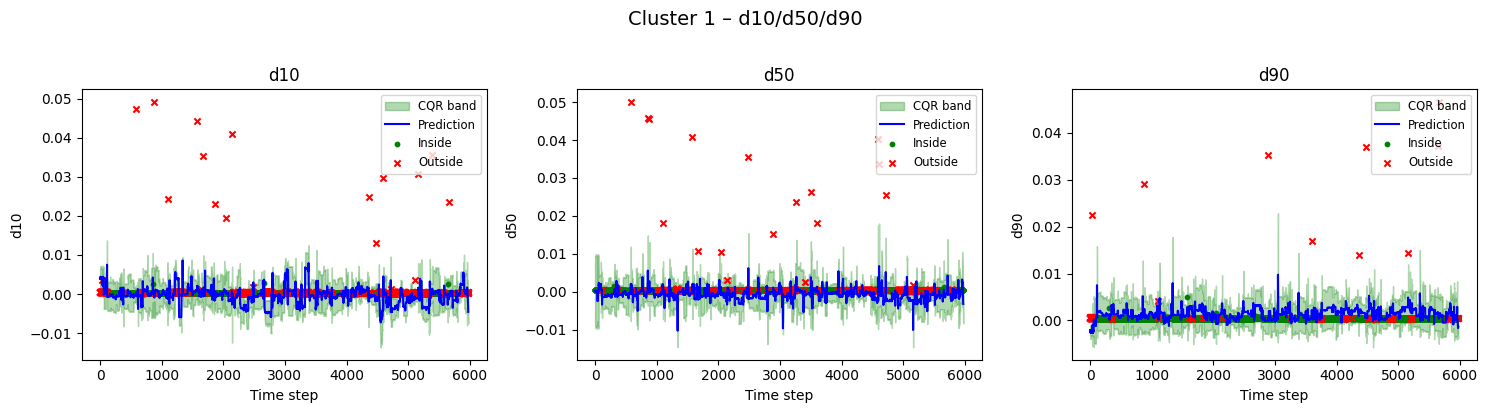

In [9]:
# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
# 16. CONFORMALIZED QUANTILE REGRESSION
# ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê

import re

ALPHA_LEVEL = 0.10  # 90% coverage

# discover clusters dynamically
eps_files = sorted(glob.glob(os.path.join(DATA_DIR_OUT, "eps_app_cluster_*.csv")))
eps_files = [f for f in eps_files if re.match(r".*eps_app_cluster_\d+\.csv", f)]
cluster_ids = [os.path.basename(f).split("_")[3].split(".")[0] for f in eps_files]

print(f"[INFO] Found clusters: {cluster_ids}")

for cluster_id in cluster_ids:
    print(f"\n>>> Cluster {cluster_id}")

    # 1) Load œÑ=0.05 & œÑ=0.95 quantile nets + their X‚Äêscaler
    q_models = {}
    for tau in (0.05, 0.95):
        ckpt = torch.load(
            os.path.join(DATA_DIR_OUT, f"quantile_{tau:.2f}_cluster_{cluster_id}.pt"),
            map_location=DEVICE,
            weights_only=False
        )
        xsc = StandardScaler()
        xsc.mean_, xsc.scale_ = ckpt["x_mean"], ckpt["x_scale"]
        net = QuantileNet(len(xsc.mean_), len(TARGET_COLS)).to(DEVICE)
        net.load_state_dict(ckpt["model"])
        net.eval()
        q_models[tau] = (net, xsc)
# 2) Build calibration features & true errors Œµ_app
    calib_csv = os.path.join(DATA_DIR_OUT, f"cluster_{cluster_id}_calib.csv")
    calib_files = pd.read_csv(calib_csv, header=None)[0].dropna().astype(str)

    X_list = []
    for fn in calib_files:
        df = read_txt(os.path.join(DATA_DIR_IN, fn))
        Xf, _ = build_narx(df)
        X_list.append(Xf)
    X_cal = np.vstack(X_list)

    eps_cal = pd.read_csv(
        os.path.join(DATA_DIR_OUT, f"eps_app_cluster_{cluster_id}.csv")
    ).values[: len(X_cal), :]

    # 3) Compute predicted lower/upper quantiles on calibration
    nets = {}
    for tau, (net, xsc) in q_models.items():
        Xs = xsc.transform(X_cal)
        with torch.no_grad():
            q = net(torch.from_numpy(Xs).to(DEVICE)).cpu().numpy()
        nets[tau] = q

    q_lo_cal = nets[0.05]
    q_hi_cal = nets[0.95]

    # 4) Compute conformity scores s_i
    s = np.maximum(q_lo_cal - eps_cal, eps_cal - q_hi_cal)
    alpha = np.quantile(s, 1 - ALPHA_LEVEL, axis=0)
    print(" Œ± per state:", dict(zip(TARGET_COLS, alpha)))

    # 5) Test set: build features
    test_csv = os.path.join(DATA_DIR_OUT, f"cluster_{cluster_id}_test.csv")
    test_files = pd.read_csv(test_csv, header=None)[0].dropna().astype(str)
    X_list, Y_list = [], []
    for fn in test_files:
        df = read_txt(os.path.join(DATA_DIR_IN, fn))
        Xf, Yf = build_narx(df)
        X_list.append(Xf)
        Y_list.append(Yf)
    X_test = np.vstack(X_list)
    Y_test = np.vstack(Y_list)

    Xs = q_models[0.05][1].transform(X_test)

    # 6) Predict quantiles on test
    with torch.no_grad():
        q_lo_test = q_models[0.05][0](torch.from_numpy(Xs).to(DEVICE)).cpu().numpy()
        q_hi_test = q_models[0.95][0](torch.from_numpy(Xs).to(DEVICE)).cpu().numpy()

    # 7) Expand intervals with Œ±
    lower_int = q_lo_test - alpha
    upper_int = q_hi_test + alpha

    # 8) Save intervals
    df_int = pd.DataFrame(
        np.hstack([lower_int, upper_int]),
        columns=[f"{s}_lo" for s in TARGET_COLS] +
                [f"{s}_hi" for s in TARGET_COLS]
    )
    df_int.to_csv(
        os.path.join(DATA_DIR_OUT, f"cqr_intervals_cluster_{cluster_id}.csv"),
        index=False
    )
    print(f"[‚úì] Wrote conformal intervals ‚Üí cqr_intervals_cluster_{cluster_id}.csv")

    # 9) Visualize coverage for d10/d50/d90
    n = min(len(Y_test), len(lower_int))
    time = np.arange(n)
    preds = (q_lo_test[:n] + q_hi_test[:n]) / 2  # center of predicted band
    Y_test = Y_test[:n]
    lower_int = lower_int[:n]
    upper_int = upper_int[:n]

    states_to_plot = ["d10", "d50", "d90", "T_PM", "T_TM", "c"]
    fig, axes = plt.subplots(1, 3, figsize=(15, 4), tight_layout=True)
    fig.suptitle(f"Cluster {cluster_id} ‚Äì d10/d50/d90", fontsize=14, y=1.02)

    for ax, state in zip(axes, states_to_plot):
        i = TARGET_COLS.index(state)
        y_true = Y_test[:, i]
        y_pred = preds[:, i]
        lo = lower_int[:, i]
        hi = upper_int[:, i]

        inside = (y_true >= lo) & (y_true <= hi)
        outside = ~inside
        cov = inside.mean() * 100

        ax.fill_between(time, lo, hi, color="green", alpha=0.3, label="CQR band")
        ax.plot(time, y_pred, color="blue", lw=1.5, label="Prediction")
        ax.scatter(time[inside], y_true[inside], c="green", s=10, label="Inside")
        ax.scatter(time[outside], y_true[outside], c="red", s=20, marker="x", label="Outside")

        ax.set_title(f"{state}")
        ax.set_xlabel("Time step")
        ax.set_ylabel(state)
        ax.legend(loc="upper right", fontsize="small")

    plt.show()

Additional Task : HyperParameter Tuning 


üöÄ Starting Hyperparameter Tuning for Cluster 0


C:\Users\tej31\AppData\Local\Temp\ipykernel_8732\3878026718.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_8732\3878026718.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_8732\3878026718.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_8732\3878026718.p


üéØ Best hyperparameters for cluster 0:
H1: 157
H2: 26
H3: 59
LR: 0.000110
WEIGHT_DECAY: 0.000000
DROPOUT: 0.071843
‚úÖ Best model saved to: narx_cluster_0_best.pt


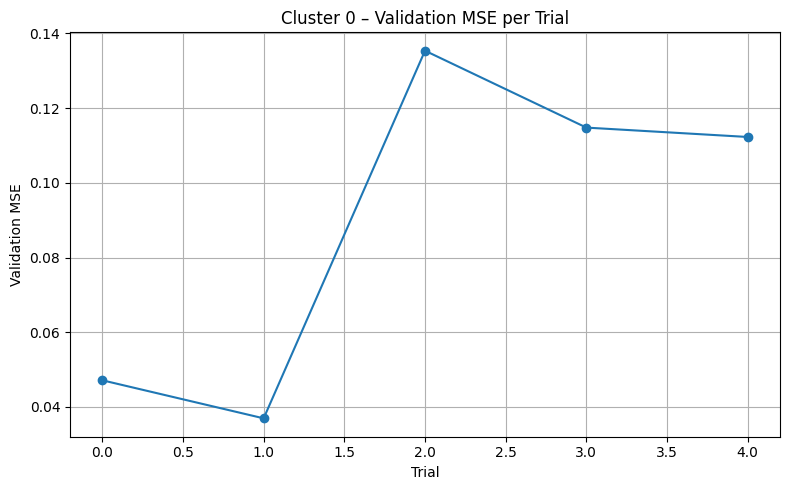

‚úÖ Validation MSE plot saved to: cluster_0_val_mse_trials.png
=== Completed Hyperparameter Tuning for Cluster 0 ===


üöÄ Starting Hyperparameter Tuning for Cluster 1


C:\Users\tej31\AppData\Local\Temp\ipykernel_8732\3878026718.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_8732\3878026718.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_8732\3878026718.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_8732\3878026718.p


üéØ Best hyperparameters for cluster 1:
H1: 99
H2: 51
H3: 143
LR: 0.000136
WEIGHT_DECAY: 0.000007
DROPOUT: 0.021836
‚úÖ Best model saved to: narx_cluster_1_best.pt


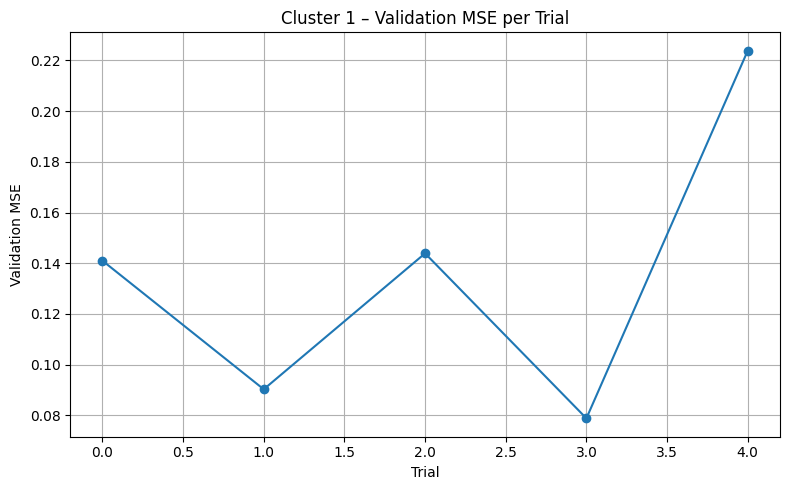

‚úÖ Validation MSE plot saved to: cluster_1_val_mse_trials.png
=== Completed Hyperparameter Tuning for Cluster 1 ===



In [68]:
import os
import glob
import optuna
from copy import deepcopy
import matplotlib.pyplot as plt
import torch
import numpy as np

# Loop over all clusters
for cl in sorted(glob.glob(os.path.join(DATA_DIR_OUT, "cluster_[0-9]*_train.csv"))):
    cid = os.path.basename(cl).split("_")[1]
    print(f"\nüöÄ Starting Hyperparameter Tuning for Cluster {cid}")

    # Load splits (same way as before)
    splits = {}
    for split in ("train", "val", "calib", "test"):
        fp = os.path.join(DATA_DIR_OUT, f"cluster_{cid}_{split}.csv")
        splits[split] = pd.read_csv(fp, header=None)[0].dropna().astype(str).tolist()

    # Load data (same way as before)
    data = {}
    for split, files in splits.items():
        Xs, Ys = [], []
        for fn in files:
            path = os.path.join(DATA_DIR_IN, fn)
            if not os.path.isfile(path):
                continue
            df = read_txt(path)
            for col in ["d10", "d50", "d90"]:
                if col in df.columns:
                    df[col] = df[col].rolling(window=50, center=True, min_periods=1).median()
            df = rolling_iqr_filter(df, ["c", "T_PM", "T_TM"], window=150, factor=1.5)
            if any(c not in df.columns for c in TARGET_COLS + INPUT_COLS):
                continue
            Xf, Yf = build_narx(df)
            if Xf.size:
                Xs.append(Xf)
                Ys.append(Yf)
        if Xs:
            data[split] = (np.vstack(Xs), np.vstack(Ys))
        else:
            data[split] = (np.empty((0, len(INPUT_COLS)*(NB+NA))), np.empty((0,len(TARGET_COLS))))

    xsc = StandardScaler().fit(data["train"][0])
    ysc = StandardScaler().fit(data["train"][1])
    for split in data:
        X, Y = data[split]
        data[split] = (xsc.transform(X), ysc.transform(Y))

    loaders = {s: make_loader(*data[s], shuffle=(s=="train")) for s in data}
    d_in = data["val"][0].shape[1]
    d_out = len(TARGET_COLS)

    best_model_state = None

    def objective(trial):
        global best_model_state

        h1 = trial.suggest_int("H1", 32, 256)
        h2 = trial.suggest_int("H2", 16, 128)
        h3 = trial.suggest_int("H3", 32, 256)
        lr = trial.suggest_loguniform("LR", 1e-5, 1e-2)
        wd = trial.suggest_loguniform("WEIGHT_DECAY", 1e-8, 1e-4)
        dropout = trial.suggest_uniform("DROPOUT", 0.0, 0.3)

        class TunedNARXNetReg(nn.Module):
            def __init__(self):
                super().__init__()
                self.net = nn.Sequential(
                    nn.Linear(d_in, h1), nn.ReLU(), nn.Dropout(dropout),
                    nn.Linear(h1, h2), nn.ReLU(), nn.Dropout(dropout),
                    nn.Linear(h2, h3), nn.ReLU(), nn.Dropout(dropout),
                    nn.Linear(h3, d_out),
                )
            def forward(self, x): return self.net(x)

        model = TunedNARXNetReg().to(DEVICE)
        opt = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)

        best_val = float("inf")
        for ep in range(1, EPOCHS+1):
            model.train()
            for xb, yb in loaders["val"]:
                xb, yb = xb.to(DEVICE), yb.to(DEVICE)
                opt.zero_grad()
                loss = weighted_mse(model(xb), yb)
                loss.backward()
                opt.step()

            # Validation
            model.eval()
            preds_v, trues_v = [], []
            with torch.no_grad():
                for xb, yb in loaders["test"]:
                    yp = model(xb.to(DEVICE)).cpu().numpy()
                    preds_v.append(yp)
                    trues_v.append(yb.numpy())
            preds_v = ysc.inverse_transform(np.vstack(preds_v))
            trues_v = ysc.inverse_transform(np.vstack(trues_v))
            vm = mean_squared_error(trues_v, preds_v)
            if vm < best_val:
                best_val = vm
                best_model_state = deepcopy(model.state_dict())

        return best_val

    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=5)

    print(f"\nüéØ Best hyperparameters for cluster {cid}:")
    for k, v in study.best_params.items():
        print(f"{k}: {v:.6f}" if isinstance(v, float) else f"{k}: {v}")

    # Save best model
    torch.save({
        "model": best_model_state,
        "x_mean": xsc.mean_, "x_scale": xsc.scale_,
        "y_mean": ysc.mean_, "y_scale": ysc.scale_,
        "config": {
            "NA": NA, "NB": NB,
            "TARGET_COLS": TARGET_COLS,
            "INPUT_COLS": INPUT_COLS,
            **study.best_params
        }
    }, os.path.join(DATA_DIR_OUT, f"narx_cluster_{cid}_best.pt"))

    print(f"‚úÖ Best model saved to: narx_cluster_{cid}_best.pt")

    # Plot validation MSE per trial
    mse_vals = [trial.value for trial in study.trials]
    plt.figure(figsize=(8,5))
    plt.plot(mse_vals, marker='o')
    plt.title(f"Cluster {cid} ‚Äì Validation MSE per Trial")
    plt.xlabel("Trial")
    plt.ylabel("Validation MSE")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(DATA_DIR_OUT, f"cluster_{cid}_val_mse_trials.png"))
    plt.show()

    print(f"‚úÖ Validation MSE plot saved to: cluster_{cid}_val_mse_trials.png")
    print(f"=== Completed Hyperparameter Tuning for Cluster {cid} ===\n")


üöÄ Training & Evaluation for Cluster 0


C:\Users\tej31\AppData\Local\Temp\ipykernel_8732\3878026718.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_8732\3878026718.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_8732\3878026718.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_8732\3878026718.p

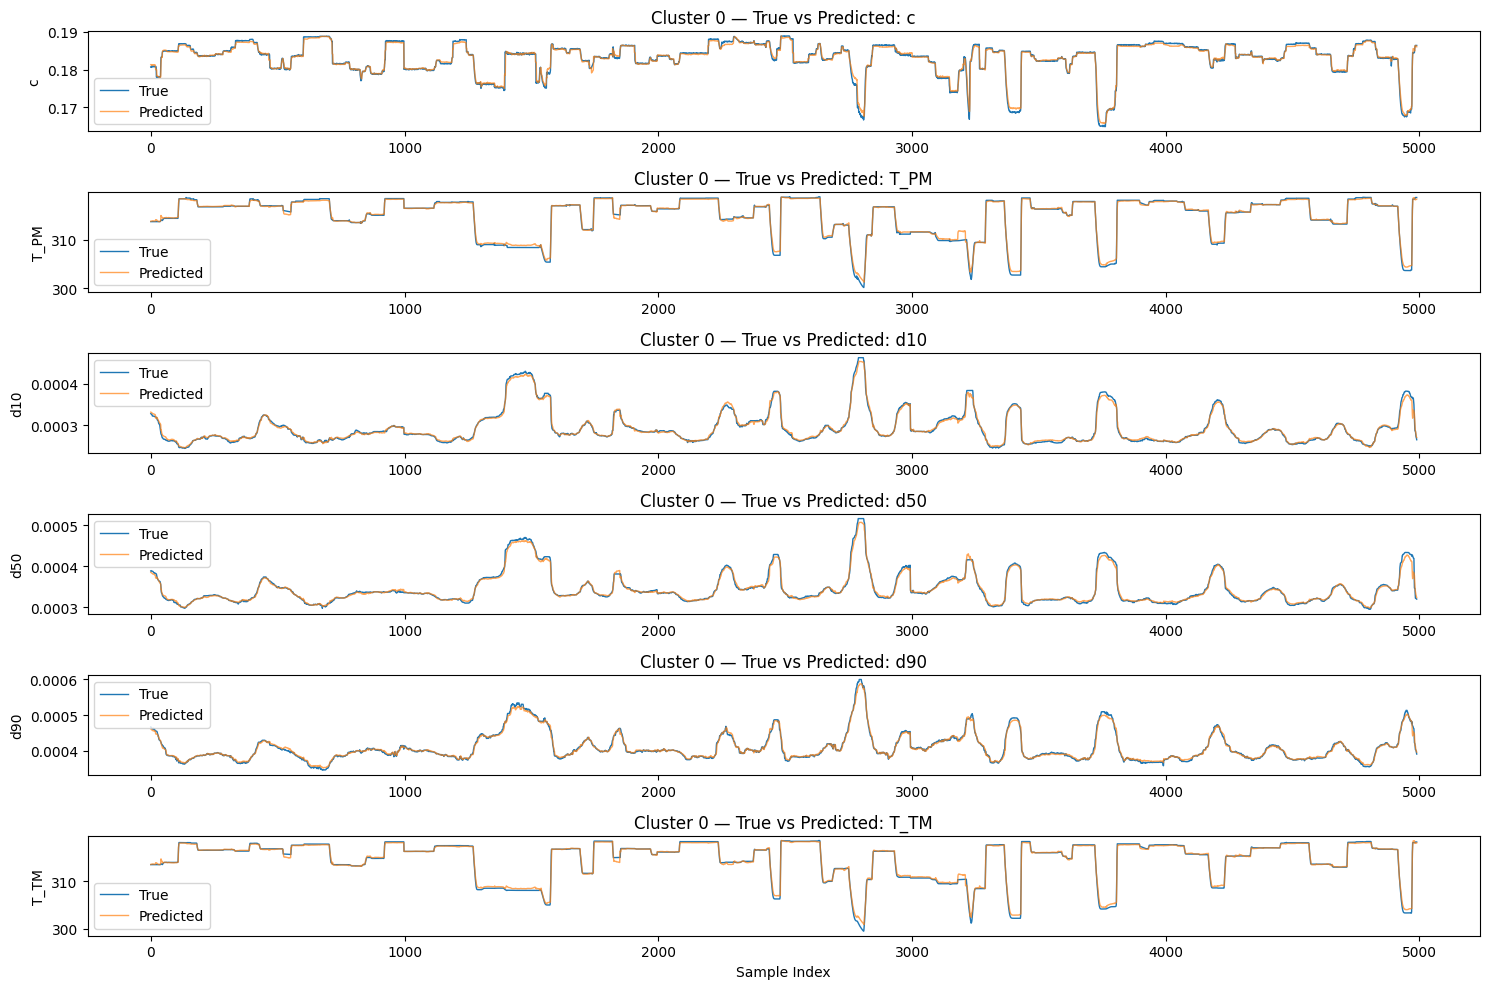

‚úÖ True vs Predicted plot saved: cluster_0_true_vs_pred.png

üöÄ Training & Evaluation for Cluster 1


C:\Users\tej31\AppData\Local\Temp\ipykernel_8732\3878026718.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_8732\3878026718.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_8732\3878026718.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[col] = df_filtered[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\tej31\AppData\Local\Temp\ipykernel_8732\3878026718.p

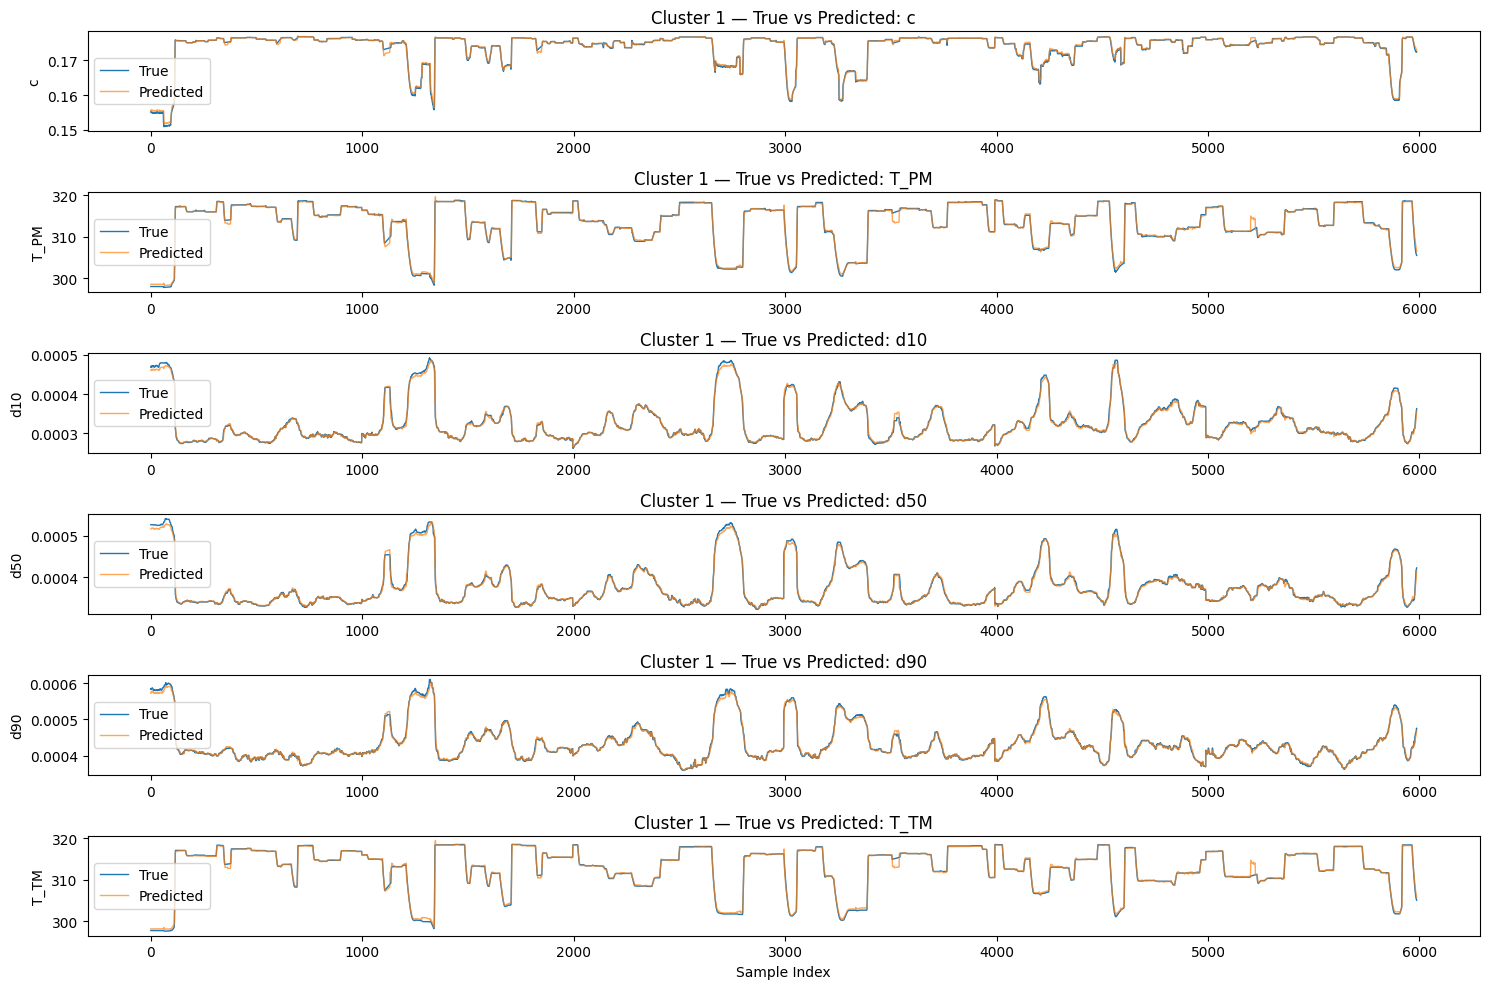

‚úÖ True vs Predicted plot saved: cluster_1_true_vs_pred.png


In [69]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os

for cid in ["0", "1"]:   # adjust if you have more clusters
    print(f"\nüöÄ Training & Evaluation for Cluster {cid}")

    # Load tuned hyperparameters & scalers
    checkpoint = torch.load(os.path.join(DATA_DIR_OUT, f"narx_cluster_{cid}_best.pt"), map_location='cpu', weights_only=False)
    best_params = checkpoint['config']

    H1, H2, H3 = best_params["H1"], best_params["H2"], best_params["H3"]
    LR, WEIGHT_DECAY, DROPOUT = best_params["LR"], best_params["WEIGHT_DECAY"], best_params["DROPOUT"]

    x_mean, x_scale = checkpoint['x_mean'], checkpoint['x_scale']
    y_mean, y_scale = checkpoint['y_mean'], checkpoint['y_scale']
    TARGET_COLS = best_params["TARGET_COLS"]
    INPUT_COLS = best_params["INPUT_COLS"]
    d_out = len(TARGET_COLS)

    # Rebuild train/test data
    splits = {}
    for split in ("train", "val", "calib", "test"):
        fp = os.path.join(DATA_DIR_OUT, f"cluster_{cid}_{split}.csv")
        splits[split] = pd.read_csv(fp, header=None)[0].dropna().astype(str).tolist()

    data = {}
    for split, files in splits.items():
        Xs, Ys = [], []
        for fn in files:
            path = os.path.join(DATA_DIR_IN, fn)
            if not os.path.isfile(path): continue
            df = read_txt(path)
            for col in ["d10", "d50", "d90"]:
                if col in df.columns:
                    df[col] = df[col].rolling(window=50, center=True, min_periods=1).median()
            df = rolling_iqr_filter(df, ["c", "T_PM", "T_TM"], window=150, factor=1.5)
            if any(c not in df.columns for c in TARGET_COLS + INPUT_COLS): continue
            Xf, Yf = build_narx(df)
            if Xf.size: Xs.append(Xf); Ys.append(Yf)
        if Xs:
            data[split] = (np.vstack(Xs), np.vstack(Ys))
        else:
            data[split] = (np.empty((0, len(INPUT_COLS)*(NA+NB))), np.empty((0,len(TARGET_COLS))))

    for split in data:
        X, Y = data[split]
        data[split] = ((X - x_mean) / x_scale, (Y - y_mean) / y_scale)

    loaders = {s: make_loader(*data[s], shuffle=(s=="train")) for s in data}
    d_in = data["train"][0].shape[1]

    # Define model
    class TunedANN(torch.nn.Module):
        def __init__(self):
            super().__init__()
            self.net = torch.nn.Sequential(
                torch.nn.Linear(d_in, H1), torch.nn.ReLU(), torch.nn.Dropout(DROPOUT),
                torch.nn.Linear(H1, H2), torch.nn.ReLU(), torch.nn.Dropout(DROPOUT),
                torch.nn.Linear(H2, H3), torch.nn.ReLU(), torch.nn.Dropout(DROPOUT),
                torch.nn.Linear(H3, d_out),
            )
        def forward(self, x): return self.net(x)

    model = TunedANN().to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

    # Train
    for ep in range(1, EPOCHS+1):
        model.train()
        for xb, yb in loaders["train"]:
            xb, yb = xb.to(DEVICE).float(), yb.to(DEVICE).float()
            optimizer.zero_grad()
            loss = weighted_mse(model(xb), yb)
            loss.backward()
            optimizer.step()

    # Evaluate on test
    Xt, Yt = data["test"]
    preds, trues = [], []
    model.eval()
    with torch.no_grad():
        for xb, yb in make_loader(Xt, Yt):
            xb = xb.to(DEVICE).float()
            yb = yb.float()
            yp = model(xb).cpu().numpy()
            preds.append(yp)
            trues.append(yb.numpy())
    preds = np.vstack(preds) * y_scale + y_mean
    trues = np.vstack(trues) * y_scale + y_mean

    # Plot true vs predicted
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(TARGET_COLS):
        ax = plt.subplot(len(TARGET_COLS), 1, i+1)
        ax.plot(trues[:, i], label='True', linewidth=1)
        ax.plot(preds[:, i], label='Predicted', linewidth=1, alpha=0.7)
        ax.set_title(f"Cluster {cid} ‚Äî True vs Predicted: {col}")
        ax.set_ylabel(col)
        ax.legend()
        if i == len(TARGET_COLS) - 1:
            ax.set_xlabel("Sample Index")
    plt.tight_layout()
    plt.savefig(os.path.join(DATA_DIR_OUT, f"cluster_{cid}_true_vs_pred.png"))
    plt.show()

    print(f"‚úÖ True vs Predicted plot saved: cluster_{cid}_true_vs_pred.png")
    # Save model and scalers